In [1]:
import numpy as np # numpy 패키지
import pandas as pd # pandas 패키지
import matplotlib.pyplot as plt # matplotlib 패키지의 pyplot 모듈을 plt로 import
import seaborn as sns

from matplotlib import rcParams # 한글 환경설정을 위한 rcparams
# 한글 환경 설정, 열 때마다 실행
# 항상 되는 것은 아님

def setting_stlyes_basic():
    rcParams['font.family']='Malgun Gothic'
    rcParams['axes.unicode_minus']='False' # 한글폰트 사용시 마이너스 기호가 깨지는 현상 방지

setting_stlyes_basic()
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

한글폰트설정.실행 후-> 런타임 다시시작  
!sudo apt-get install -y fonts-nanum  
!sudo fc-cache -fv  
!rm ~/.cache/matplotlib -rf  
  
import matplotlib.pyplot as plt # 맷플롯립 import 하기  
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기  

- 스케일조정=>sns.set_context 함수를 이용해 설정 가능

In [2]:
sns.set_context('paper', # notebook, talk, poster
                rc={'font.size':15, 
                    'xtick.labelsize':15, 
                    'ytick.labelsize':15, 
                    'axes.labelsize':15})

- pip install scikit-learn
- pip install seaborn
- pip install statsmodels

In [3]:
df_titanic = sns.load_dataset('titanic')    # 타이타닉호 데이터
df_iris = sns.load_dataset('iris')          # 붓꽃 데이터
df_penguins = sns.load_dataset('penguins')  # 펭귄 데이터
df_tips = sns.load_dataset('tips')          # 팁 데이터
df_diamonds = sns.load_dataset('diamonds')  # 다이아몬드 데이터
df_planets = sns.load_dataset('planets')    # 행성 데이터
df_flights = sns.load_dataset('flights')    # 비행 데이터

from sklearn.datasets import load_wine
wine_data = load_wine()
df_wines = pd.DataFrame(data=wine_data.data, # 와인 데이터
                       columns=wine_data.feature_names)

In [4]:
type(wine_data)

sklearn.utils._bunch.Bunch

- 다변량 데이터 : 변량이 2개인 이변량 데이터와 변량이 3개 이상인 데이터를 포함함.
- 다변량 데이터를 그래프로 표현할 때는 색상으로 구분하는 hue, 캔버스로 구분하는 col, 점 크기로 구분하는 size 등의 파라미터를 이용해 시각화 차원을 넓혀나갈 수 있음

# 다차원 데이터 시각화 : 범주형
1. 병렬막대그래프
- 두 변량에 대한 빈도 막대그래프 2개를 각각의 캔버스(Canvas)에 병령로 나열한 나열한 그래프.
  - 병렬 빈도 막대그래프를 그리려면 sns.catplot 함수에 kind='count'와 col 옵션을 추가하면 됨. sns.count 함수로는 병렬 막대그래프를 그릴 수 없음.

In [5]:
sns.catplot(x='class',
            col = 'who', #캔버스 분리하기
            kind ='count',#빈도 막대그래프 그리기
            data = df_titanic) 

2. 다중막대그래프
- 다중 막대그래프는 sns.countplot()또는 sns.catplot()에 hue 파라미터를 설정해서 그릴 수 있음. hue 옵션은 변량을 색상으로 구분하는 파라미터
- palette 참고) https://seaborn.pydata.org/tutorial/color_palettes.html

In [6]:
sns.countplot(x='class',hue='who',data=df_titanic)

<Axes: xlabel='class', ylabel='count'>

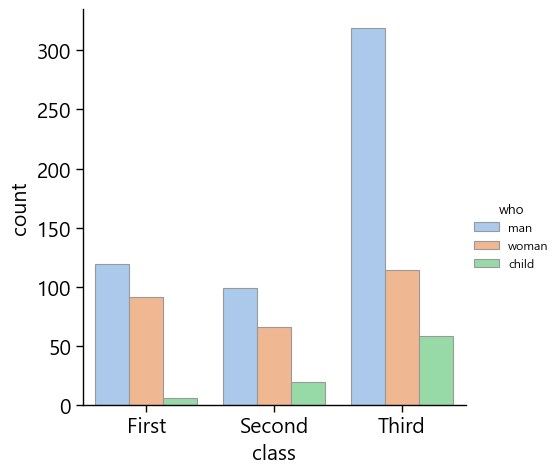

In [7]:
sns.catplot(x='class', hue='who',kind='count',
            palette = 'pastel',#색상 팔레트 지정 : 'man':b, woman:'g, chile:'r'
            edgecolor='.6', #막대 테두리 색상 투명도 지정.
            data = df_titanic)

- sns.histplot 함수에 multiple='dodge' 옵션을 주어도 다중 막대그래프를 그릴 수 있음.
- sns.histplot 함수는 수치형 자료를 히스토그램으로 만들 때 사용하는 함수이지만, 히스토그램의 막대 사이에 간격을 주고 x축 눈금을 없애면 히스토그램을 일반 막대그래프처럼 만들 수 있음


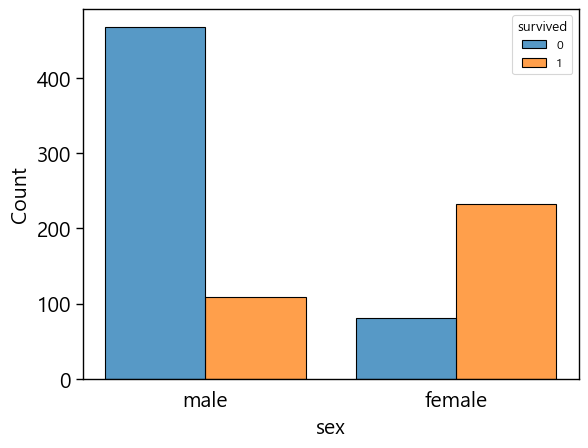

In [8]:
ax = sns.histplot(x='sex', hue='survived',
                  multiple = 'dodge', #다중 막대그래프 그리기
                  shrink=.8, #막대 사이 간격 조정
                  data = df_titanic)
ax.tick_params(bottom=False) # x축 눈금 숨기기

- 수평 다중 막대 그래프
  - 수평 다중막대그래프를 그리고 싶다면 수직 다중 막대그래프를 그릴때 사용한 함수에 x파라미터, y파라미터를 사용하면된다

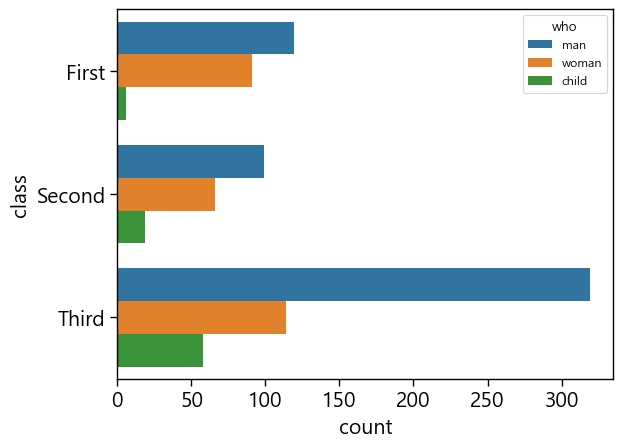

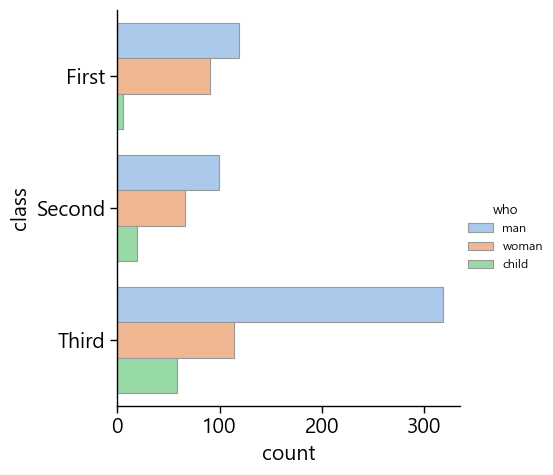

In [9]:
sns.countplot(y='class',hue='who',data = df_titanic)

# 또는

sns.catplot(y='class',hue='who',kind='count',
            palette='pastel', edgecolor='.6',
            data=df_titanic)

3. 누적막대그래프
- seaborn으로 누적막대그래프를 만들려면 sns.histplot 함수에 multiple='stack' 옵션을 주면 된다

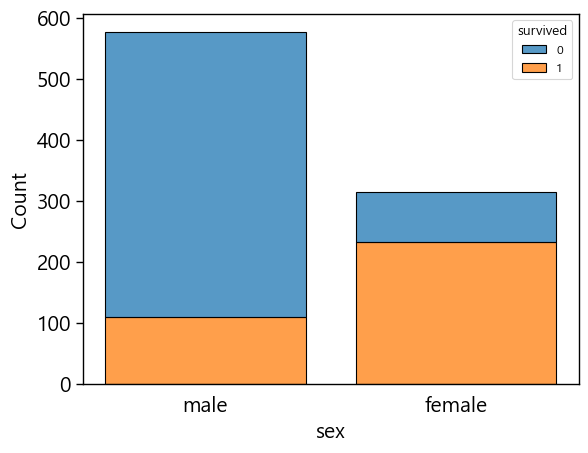

In [10]:
ax = sns.histplot(x='sex', hue='survived',
                  multiple = 'stack', #다중 막대그래프 그리기
                  shrink=.8, #막대 사이 간격 조정
                  data = df_titanic)
ax.tick_params(bottom=False) # x축 눈금 숨기기

- 단순 수평 누적 막대그래프
  - 수평 누적 막대그래프를 그리려면 x파라미터 대신 y 파라미터를 사용하면 됩니다.

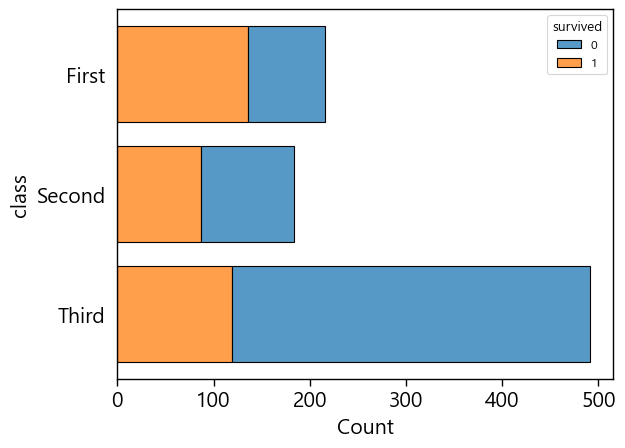

In [11]:
ax = sns.histplot(y='class', hue='survived',
                  multiple = 'stack', #다중 막대그래프 그리기
                  shrink=.8, #막대 사이 간격 조정
                  data = df_titanic)
ax.tick_params(left=False) # y축 눈금 숨기기

지금까지 다중 막대그래프와 누적 막대그래프로 이변량 범주형 데이터를 시각화하는 법을 알아보았습니다. 막대그래프 외에도 변량이 모두 범주형인 다차원 데이터를 시각화할 때는 모자이크 그래프(mosaic plot)를 사용하기도 합니다. 모자이크 그래프는 그룹 내의 데이터 백분율을 보여주는 누적 막대그래프입니다. 모자이크 그래프는 변수가 3개 이상일 때도 사용할 수 있습니다.

모자이크 그래프는 statmodels.graphics.mosaic 패키지의 mosaic 함수를 이용해서 그립니다. 코드는 다음과 같습니다.

Text(0.5, 1.0, '타이타닉호 성별 생존자')

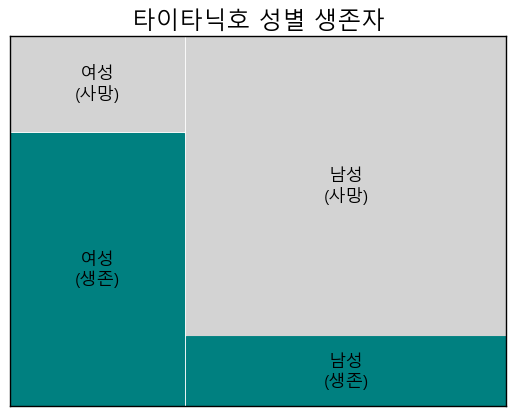

In [12]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

props=lambda key:{'color':'teal' if '1' in key else 'lightgray'}
labelizer=lambda k:{('female','1'):'여성\n(생존)', ('female','0'):'여성\n(사망)',
                    ('male','1'):'남성\n(생존)', ('male','0'):'남성\n(사망)'}[k]
mosaic(df_titanic.sort_values('sex'), 
       ['sex', 'survived'], 
       properties=props, # 색상 변경
       labelizer=labelizer, # 라벨 변경
       axes_label=False) # 축 라벨 숨기기
plt.title('타이타닉호 성별 생존자', fontsize=17) # 제목 내용 및 글자 크기 설정

# 다차원 데이터 시각화 : 수치형
1. 점그래프
- 점그래프는 데이터포인트를 점으로 나타낸 도표입니다. 점 그래프를 이용하면 데이터의 실제 위치와 분포를 한눈에 파악할 수 있습니다. seaborn에서 점 그래프를 그리는 기본 함수는 sns.stripplot입니다.

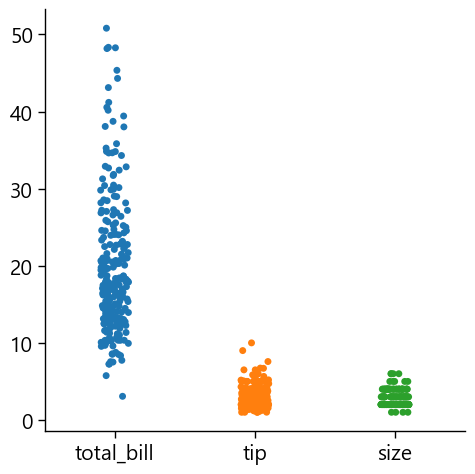

In [13]:
sns.stripplot(data=df_tips)

# 또는

sns.catplot(kind='strip', data=df_tips)

- sns.stripplot 함수에 jitter 옵션을 추가하면 데이터포인트를 일렬로 그릴 수 있습니다.
  - jitter: 지터(jitter)는 데이터 값에 약간의 노이즈를 추가하는 것, 노이즈를 추가하면 데이터 값이 조금씩 움직여서 같은 값을 가지는 데이터가 그래프에 여러 번 겹쳐서 표시되는 현상을 막아줌

In [14]:
sns.stripplot(x='total_bill', y='smoker',
              jitter=False,
              data=df_tips)

<Axes: xlabel='total_bill', ylabel='smoker'>

<Axes: xlabel='total_bill', ylabel='smoker'>

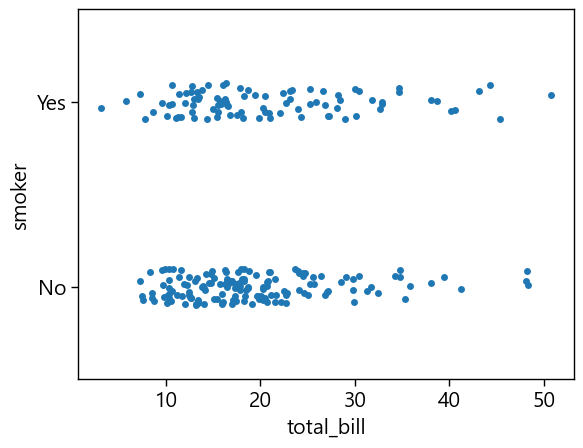

In [15]:
sns.stripplot(x='total_bill', y='smoker',
              jitter=True,
              data=df_tips)

- 데이터포인트가 서로 겹치는 것을 방지하려면 dodge=True 옵션을 사용하면 됩니다.
  - dodge=True: hue로 구분된 그룹 사이 간격을 만들어 데이터가 겹치는 것을 방지

<Axes: xlabel='tip', ylabel='day'>

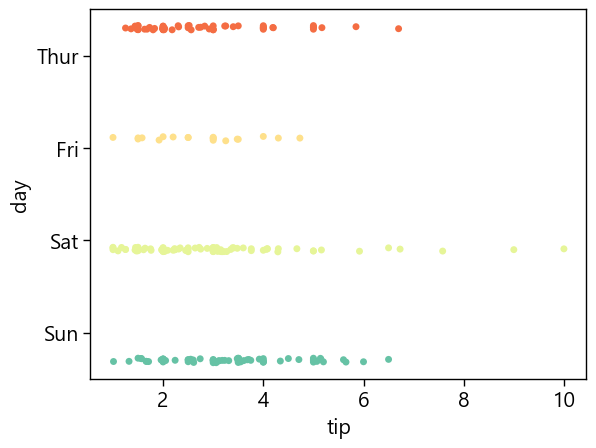

In [16]:
sns.stripplot(x='tip',y='day',
              palette='Spectral',
              dodge=True,
              data=df_tips)

<Axes: xlabel='tip', ylabel='day'>

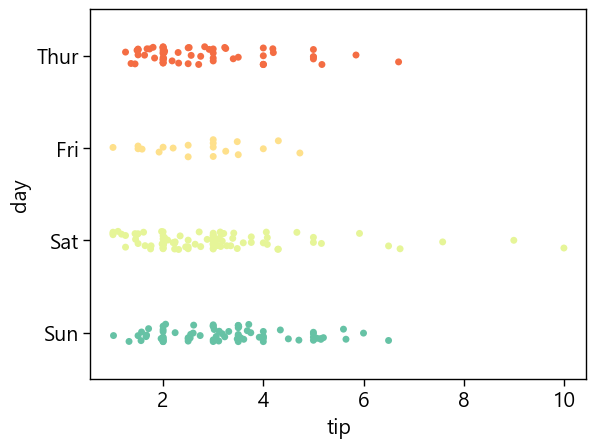

In [17]:
sns.stripplot(x='tip',y='day',
              palette='Spectral',
              dodge=False,
              data=df_tips)

- dodge=True 옵션처럼 점그래프에서 데이터 포인트들이 서로 겹치지 않고 새의 무리처럼 보이게 그래프를 만드는 방법도 있습니다. 이때 사용하는 함수가 sns.swarmplot입니다

- swarmplot
    - swarmplot 함수를 이용하면 점도표의 데이터포인트를 떼(swarm)처럼 무리를 만들어 데이터포인트가 중첩되는 문제를 해결할 수 있습니다. 떼 플롯을 그리는 기본 코드는 다음과 같습니다.

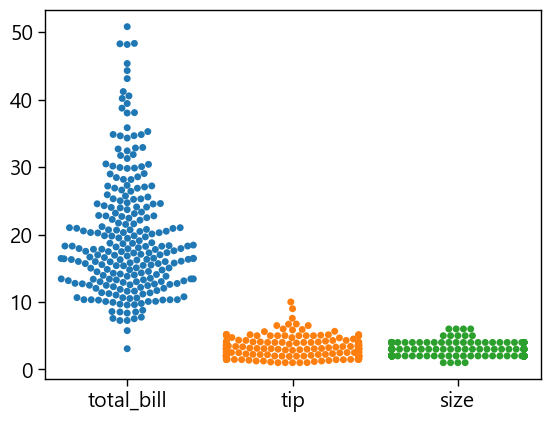

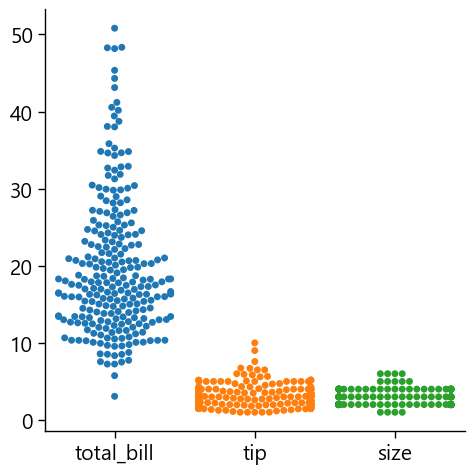

In [18]:
sns.swarmplot(data=df_tips)

# 또는

sns.catplot(kind='swarm',data=df_tips)

- x와 y의 파라미터를 사용하면 각 변수에 대한 떼 플롯을 만들 수 있음

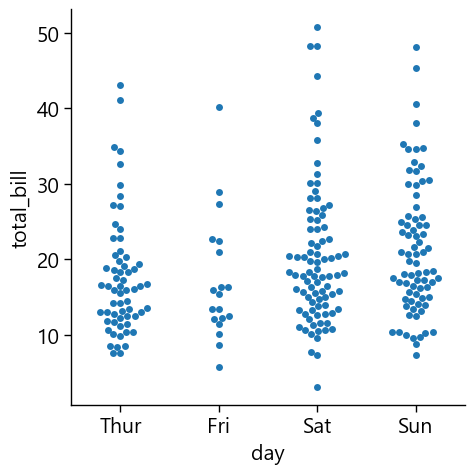

In [19]:
sns.swarmplot(x='day', y='total_bill', data=df_tips)

# 또는

sns.catplot(x='day', y='total_bill', kind='swarm', data=df_tips)

2. 선분 그래프
- 실수 데이터의 분포를 선분으로 표현하고 싶다면 sns.rugplt 함수를 이용하면 된다  
- sns.rugplot은 데이터포인트를 각 축 위에 보여준다

In [20]:
tips=sns.load_dataset('tips')
sns.scatterplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

In [21]:
tips=sns.load_dataset('tips')
sns.scatterplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

<Axes: xlabel='total_bill', ylabel='tip'>

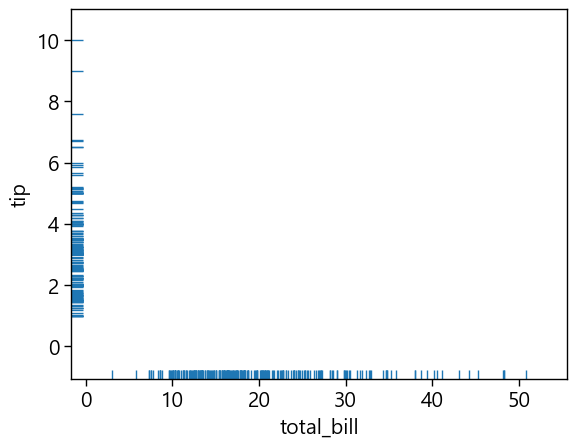

In [22]:
sns.rugplot(data=tips, x='total_bill', y='tip')

3. 요약 통계값 막대그래프  
- 요약 통계값 막대그래프는 범주로 구분되는 수치형 자료의 평균과 그 평균의 95% 신뢰구간(confidence intervals)을 나타낸 막대그래프입니다. 신뢰구간은 막대 위 검정색 수직 선으로 표현됩니다. 요약 통계값 막대그래프를 그리려면 sns.barplot 함수를 사용하면 됩니다. sns.catplot 함수에 kind='bar' 옵션을 주어도 됩니다. 먼저 수직 요약 막대그래프를 그리는 법부터 알아보겠습니다.  

기본

- 수직 요약 막대그래프
  - 수직 평균 막대그래프를 그리는 코드는 다음과 같습니다.

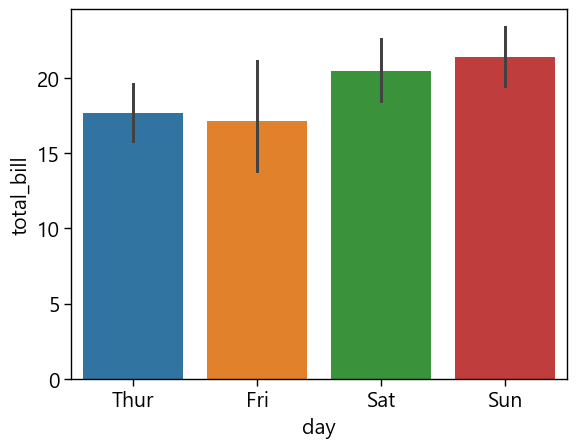

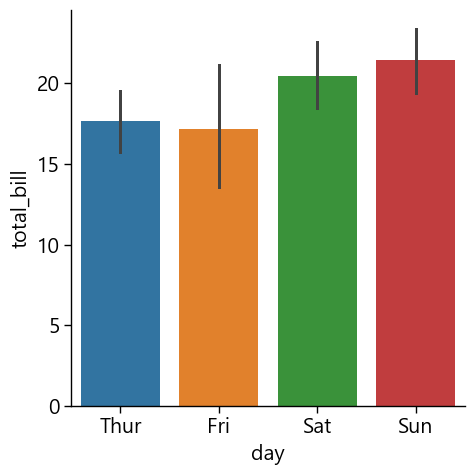

In [23]:
sns.barplot(x='day', y='total_bill', data=tips)

#또는

sns.catplot(x='day', y='total_bill', kind='bar', data=tips)

- 여기에 ci(conf='sd') 옵션을 주면 신뢰구간이 아니라 표준편차(standard deviation)를 표현할 수 있습니다.

수평 요약 막대그래프

- 만일 요약 막대그래프를 수평으로 그리고 싶다면 sns.barplot 함수에 orient='h' 옵션을 추가하면 됩니다.이탤릭체 텍스트

<Axes: xlabel='total_bill', ylabel='day'>

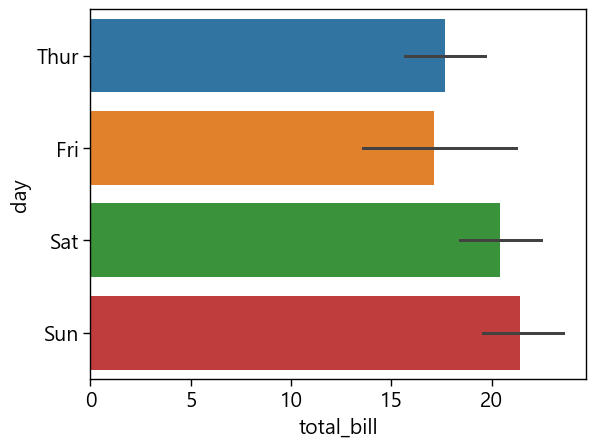

In [24]:
sns.barplot(x='total_bill', y='day', data=tips)

- 다중요약막대그래프    
  - sns.barplot 함수에 hue 파라미터를 추가하면 평균을 나타내는 다중 막대그래프를 그릴 수 있습니다.
- 수직 다중요약막대그래프
  - 다음은 변량이 3개인 데이터를 수직 다중 요약 막대그래프로 표현하는 예시코드입니다. 

<Axes: xlabel='day', ylabel='total_bill'>

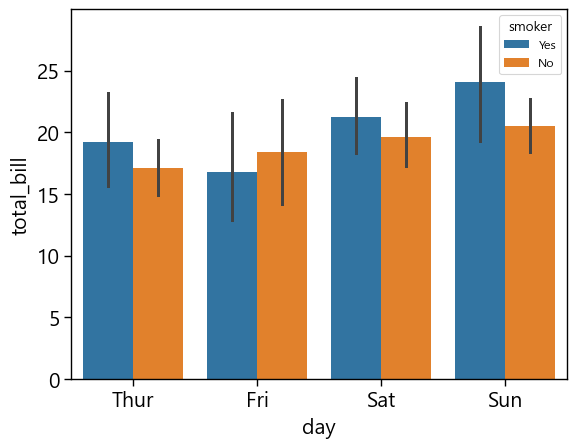

In [25]:
sns.barplot(x='day', y='total_bill', hue='smoker', data=tips)

- 수평 다중 요약 막대그래프 - 수평 다중 요약 막대그래프를 그리고 싶으면 x파라미터와 y파라미터를 바꾼 후 orient=h 파라미터값을 추가하면 됩니다.

<Axes: xlabel='total_bill', ylabel='day'>

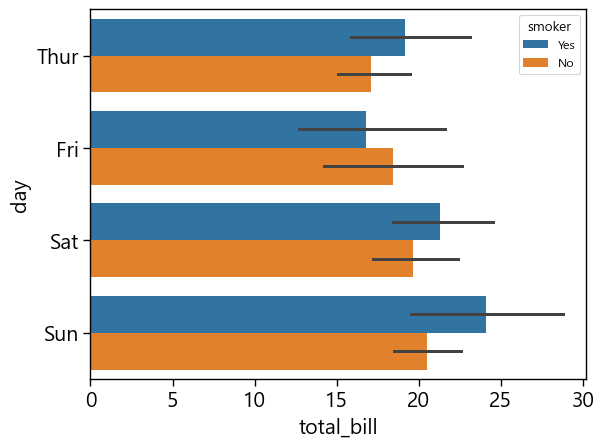

In [26]:
sns.barplot(x='total_bill', y='day',orient='h',hue ='smoker',data=tips)

- 누적 요약 막대그래프
  - 누적요갸막대그래프를 그리고싶다면 sns.barplot함수에 dodge=False를 추가하면 됩니다. seaborn에서 누적 막대그래프는 평균값을 나타내는 막대의 최댓값 위에 다른 평균값을 나타내는 막대를 쌓아서 만드는 것이 아니라 그래프 자체를 서로 겹쳐서 그린것입니다.

<Axes: xlabel='day', ylabel='total_bill'>

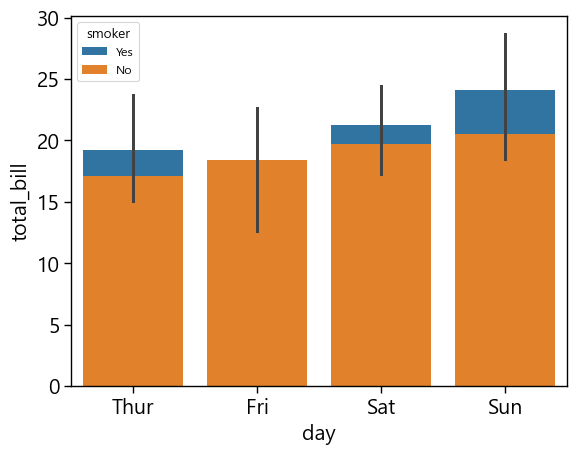

In [27]:
sns.barplot(x='day',y='total_bill', hue='smoker', dodge=False, data=tips)

- 누적 요약 막대그래프는 sns.barplot 함수를 연이어 사용해서 그릴 수도 있습니다.

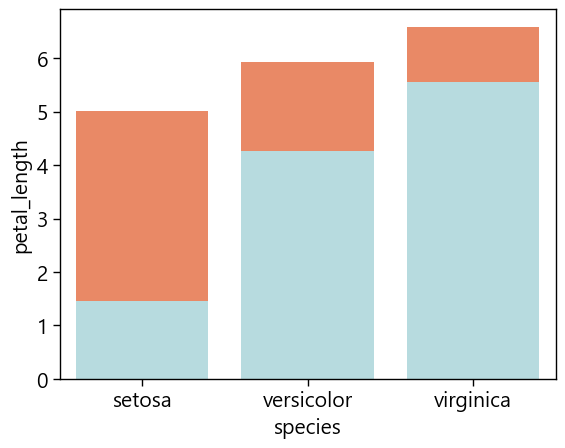

In [28]:
iris = sns.load_dataset('iris')
s1 = sns.barplot(x='species', y='sepal_length',
                 color = 'coral', ci=None, data=iris)
s2 = sns.barplot(x='species', y='petal_length',
                 color = 'powderblue', ci=None, data=iris)

- 위 그래프에서 막대의 y축값은 각각 sepal_length의 평균과, petal_length의 평균을 나타냅니다.

4. 포인트 plot
- sns.barplot을 이용해 그린 그래프에서는 평균을 막대로 표시했습니다. 만일 평균값을 점으로 표현하고 평균에 대한 95% 신뢰구간을 나타내고싶다면 sns.pointplot 함수를 이용할 수 있습니다.

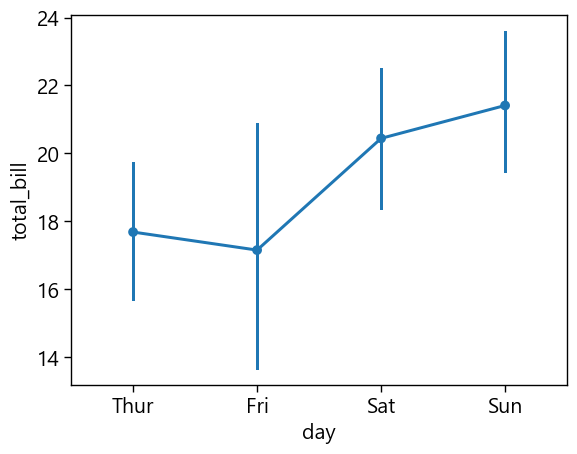

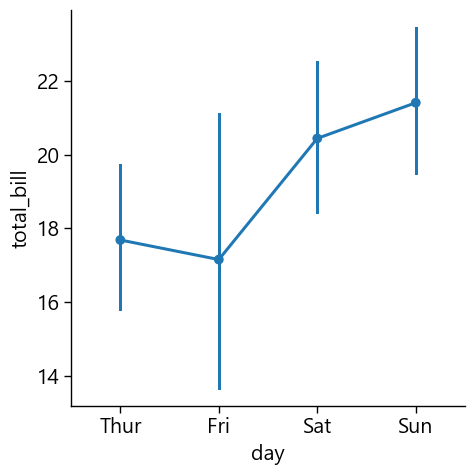

In [29]:
sns.pointplot(x='day',y='total_bill',data=tips)

# 또는
sns.catplot(x='day',y='total_bill',kind='point',data=tips)


- 만일 신뢰구간이 아니라 표준편차를 표현하고 싶다면 ci='sd'를 추가하면 됩니다. 선과 포인트를 다른 모양으로 표현할 수도 있습니다. 예시코드는 다음과 같습니다.

<Axes: xlabel='class', ylabel='survived'>

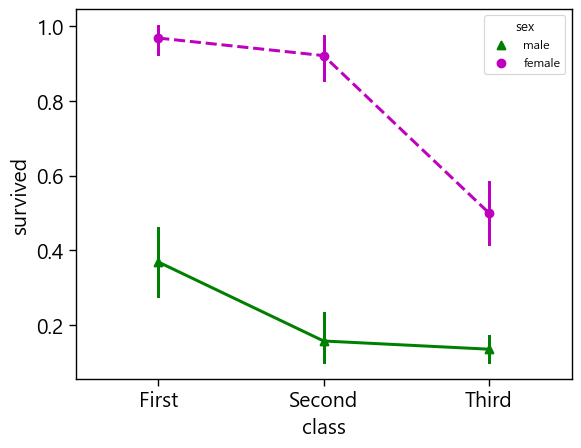

In [30]:
titanic = sns.load_dataset('titanic')
sns.pointplot(x='class',y='survived', hue='sex',
              palette={'male':'g','female':'m'},
              markers=['^','o'], #마커지정
              linestyles=['-','--'], #선 스타일 지정
              data = titanic)

- 지금까지 sns.barplot함수와 sns.pointplot 함수를 이용해 요약 통계값을 표현하는 그래프를 만들어보았습니다. 만일 자료의 요약값이 아니라 자료의 실제값을 등급에 따라 분류해 각 등급의 빈도수를 나타내고 싶다면 히스토그램(histogram)을 이용하면 됩니다.

5. 히스토그램
- Seaborn에서 히스토그램을 만드는 함수는 sns.histplot입니다. sns.displot함수를 이용해도 됩니다. Seaborn에서 sns.histplot 함수로 이변량 히스토그램(bivariate histogram)을 그릴때는 변량을 색상으로 구분합니다. 여기서는 sns.histplot 대신 sns.displot을 이용해 히스토그램을 만들어보겠습니다.

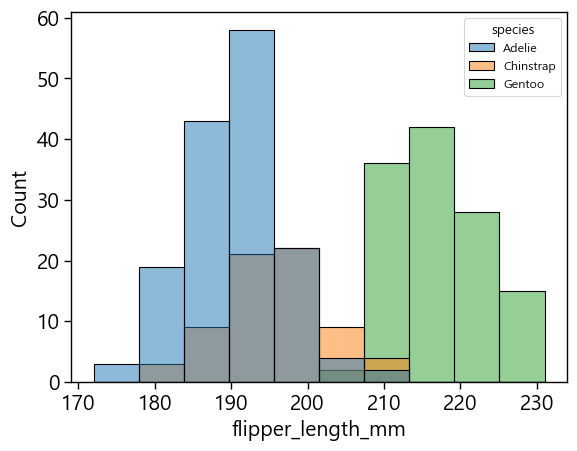

In [31]:
penguins=sns.load_dataset('penguins')
sns.histplot(x='flipper_length_mm', hue='species',data=penguins)
# 또는
sns.displot(x='flipper_length_mm', hue='species', data=penguins)

옵션을 이용하면 다양한 종류의 히스토그램을 그릴 수 있습니다.  
hue:그룹별 히스토그램  
multiple='stack':누적히스토그램  
multiple='dodge':다중히스토그램  

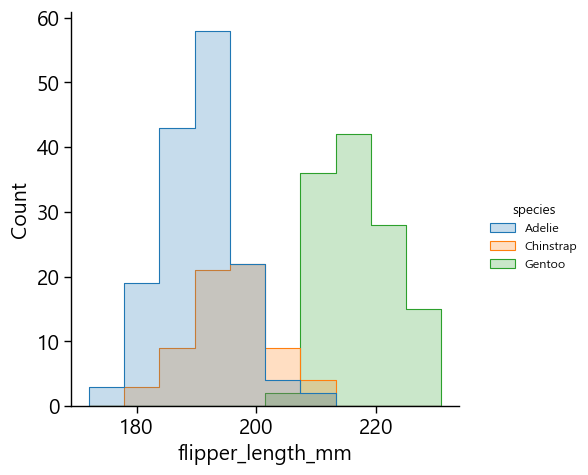

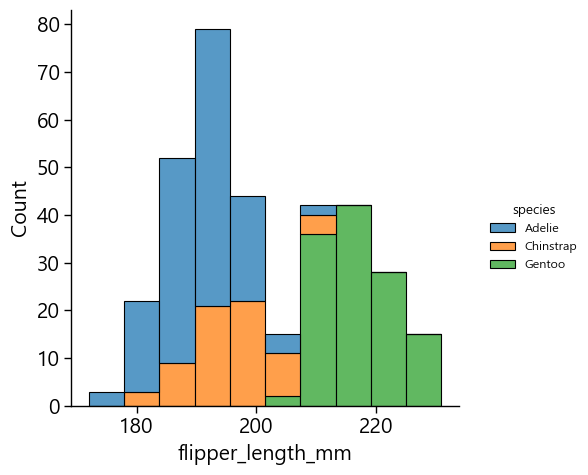

In [32]:
sns.displot(x='flipper_length_mm', hue='species', element='step', data=penguins)
sns.displot(x='flipper_length_mm', hue='species', multiple='stack', data=penguins)
sns.displot(x='flipper_length_mm', hue='species', multiple='dodge', data=penguins)

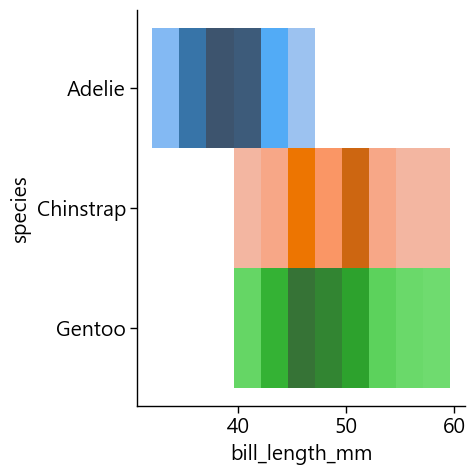

In [33]:
sns.displot(x='bill_length_mm', y='species', hue='species',
            legend=False, data=penguins)

- log_scale=True : x축값로그 스케일로 변환
- element='poly': 그래프를 분포다각형(distribution polygon)으로 지정
- fill=False:그래프 선 아래 색깔 채우지 않기

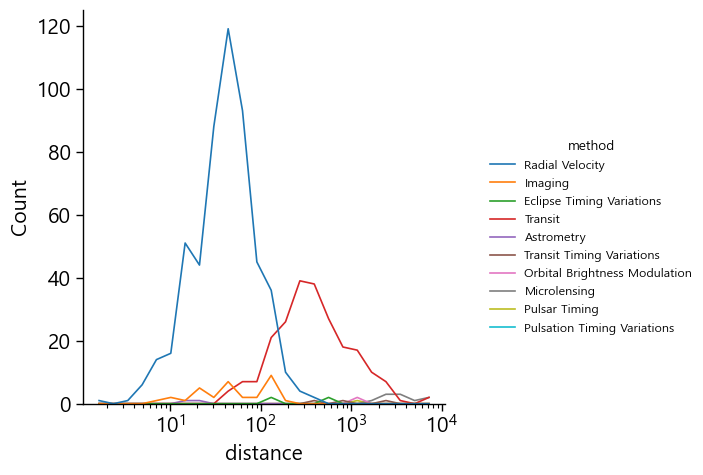

In [34]:
planets=sns.load_dataset('planets')
sns.displot(x='distance', hue='method', log_scale=True,
            element='poly', fill=False, data=planets)

- 한 캔버스 내에 여러 그래프를 그리지 않고 그래프를 서로 다른 캔버스에 나누어서 그리고 싶다면 col 옵션을 사용하면 됩니다. col 옵션은 그래프를 개별 캔버스에 나누어 그려줍니다.

In [35]:
sns.displot(x='flipper_length_mm',
            col='sex', # 성별에 따른 캔버스 구분
            data=penguins)

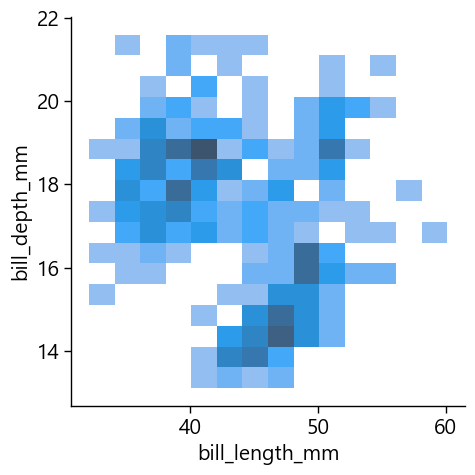

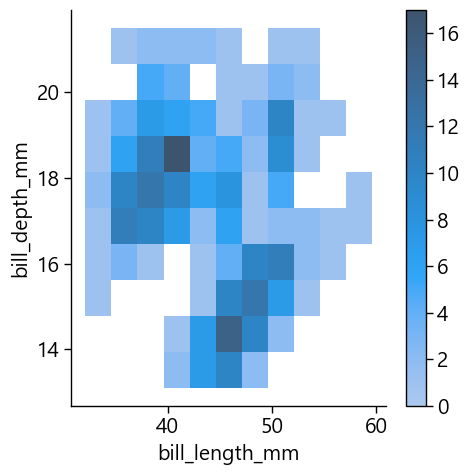

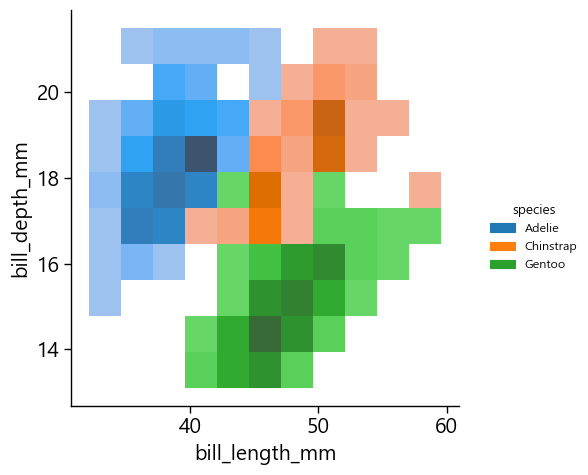

In [36]:
# 코드1: 2차원 - 기본
sns.displot(x='bill_length_mm', y='bill_depth_mm', 
            data=penguins)

# 코드2: 2차원 - 직사각형 넓이 조정
sns.displot(x='bill_length_mm', y='bill_depth_mm', binwidth=(2, .5), 
            data=penguins)

# 코드3: 2차원 - 컬러바 유무 지정
sns.displot(x='bill_length_mm', y='bill_depth_mm', cbar=True, 
            data=penguins)

# 코드4: 3차원 - 그룹별 색으로 분류
sns.displot(x='bill_length_mm', y='bill_depth_mm', hue='species', 
            data=penguins)

- bins: 등급 수 지정하기
- discrete: x축 라벨을 막대 중간에 위치시키기(True)
- pthresh: 전체 데이터 중에서 해당 비율(0~1)의 셀 투명 처리하기
- pmax: 포화도 최댓값(0~1) 지정하기

In [37]:
# 코드1 : 튜플로 x와 y변수 다르게 지정.
sns.displot(planets, x='year',y='distance',
            bins=30, discrete=(True,False),log_scale=(False,True))
#코드 2 : 관측치가 없는 부분 색으로 표시(투명하게 표시하지 않기.)
sns.displot(planets, x='year',y='distance',
             bins=30, discrete=(True,False),
             log_scale=(False,True),
             thresh=None)
#코드3 : 한계점과 포화도 지정
sns.displot(planets,x='year',y='distance',
            bins=30, discrete=(True,False),
            log_scale=(False,True),
            pthresh=.05,pmax=.9)
#코드 4 : 컬러맵 추가
sns.displot(planets, x='year',y='distance',
            bins=30, discrete=(True, False),
            log_scale=(False,True),
            cbar=True, cbar_kws=dict(shrink=.75))

지금까지 여러 가지 옵션을 이용해 다양한 종류의 기본 히스토그램을 그려보았습니다. 만일 그룹별로 관측수가 다른 히스토그램을 비교하고 싶다면, 기본 히스토그램을 정규화(normalization)하면 됩니다.

정규화는 모든 데이터 포인트(data point)가 동일한 정도의 스케일(중요도)로 해석되도록 만드는 과정입니다. 정규화는 모든 데이터 포인트의 중요도를 균등하게 만듭니다. 따라서, 이상치를 지닌 특정 속성이 전체 속성처럼 대표되는 일반화의 오류를 방지할 수 있습니다. 정규화를 거친 히스토그램은 정규 히스토그램(normalized histogram)이 됩니다.

정규화를 위한 스케일링 기준점으로는 전체 관측수와 면적을 이용하는 방법이 있습니다. 먼저 전체 관측수로 정규화한 히스토그램을 만들어보겠습니다.

정규 히스토그램(전체 관측수) Seaborn에서 전체 관측수로 정규화한 히스토그램을 만들려면 sns.histplot 함수 또는 sns.displot 함수에 stat='probability' 또는 stat='percent' 옵션을 추가하면 됩니다. stat 옵션에 probability 인자를 주면 y축이 확률(probability)인 그래프가 그려집니다. 반면, percent 옵션을 사용하면 y축이 백분율(percent)인 그래프가 만들어집니다. 전자의 경우 막대들의 높이를 모두 더하면 1이 되고, 후자의 경우에는 100이 됩니다. 이 옵션을 추가면 각 등급의 빈도수를 전체 관측수로 나눈 정규 히스토그램을 만들 수 있습니다. 예시 코드는 다음과 같습니다.

In [38]:
# 코드1: y축이 비율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='probability', data=penguins)

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

<Axes: xlabel='flipper_length_mm', ylabel='Percent'>

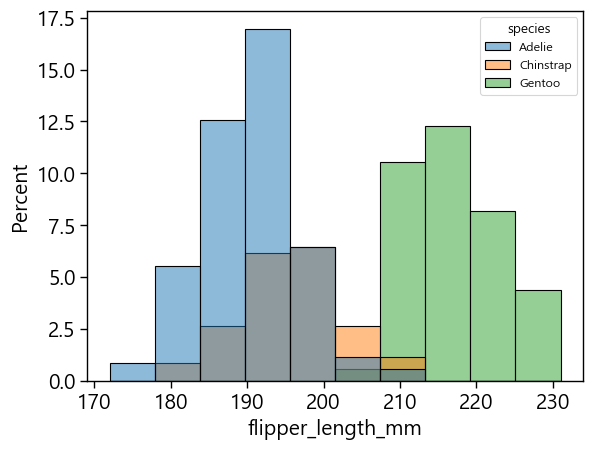

In [39]:
# 코드2: y축이 백분율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='percent', data=penguins)

- 여기서 commont_norm 옵션을 False로 지정하면 히스토그램을 전체 관측수가 아니라 개별 그룹의 관측수로 정규화할 수 있습니다. 이때 만들어지는 히스토그램은 서로 독립적입니다.

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

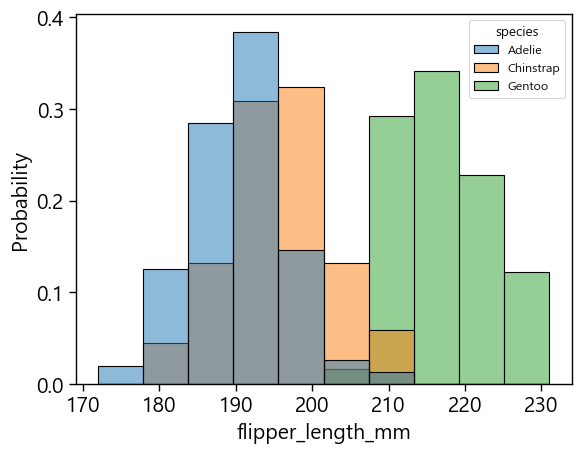

In [40]:
# 코드1: y축이 비율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='probability', 
             common_norm=False, data=penguins)

<Axes: xlabel='flipper_length_mm', ylabel='Percent'>

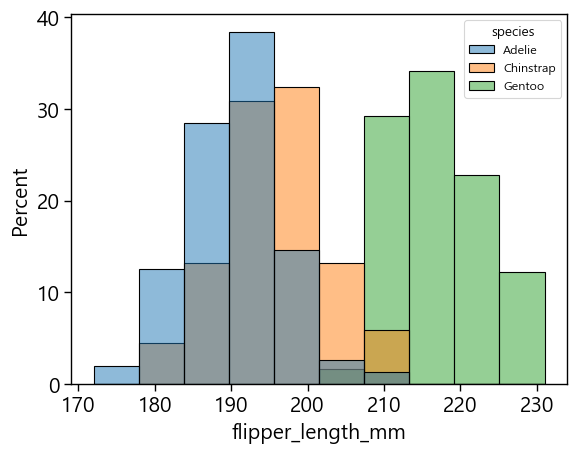

In [41]:
# 코드2: y축이 백분율인 정규 히스토그램
sns.histplot(x='flipper_length_mm', hue='species', 
             stat='percent', 
             common_norm=False, data=penguins)

이번에는 전체 관측수가 아니라 면적으로 정규화한 히스토그램을 만드는 법을 알아보겠습니다.

정규 히스토그램(면적)

Seaborn에서 면적으로 정규화한 정규 히스토그램을 만들려면 stat='density' 옵션을 이용하면 됩니다. 이 옵션은 각 등급의 빈도수를 전체 관측치의 개수와 막대 너비(width)의 곱으로 나눈 정규 히스토그램을 만들어줍니다. 이 히스토그램에서 y축은 밀도(density)가 되고, 각 막대의 넓이를 모두 더한 합은 1이 됩니다. 만일, 독립적인 히스토그램을 그리고 싶다면 common_norms=False 옵션을 추가하면 됩니다. 코드는 다음과 같습니다.

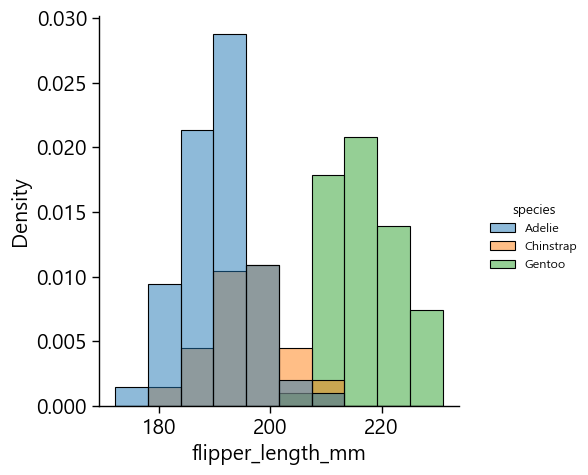

In [42]:
# 코드1: y축이 밀도인 정규 히스토그램
sns.displot(penguins, x='flipper_length_mm', hue='species', 
            stat='density') 

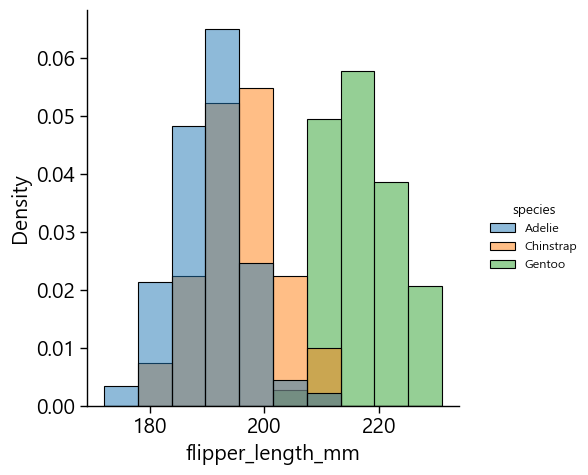

In [43]:
# 코드2: y축이 밀도인 개별 히스토그램
sns.displot(penguins, x='flipper_length_mm', hue='species', 
            stat='density',
            common_norm=False)

지금까지 Seaborn에서 기본 히스토그램과 2가지 종류의 정규 히스토그램을 만드는 법을 살펴보았습니다. 히스토그램은 직관적입니다. 히스토그램은 데이터의 분포를 빠르고 한눈에 파악하고 싶을 때 사용하면 좋습니다.

하지만 한계도 있습니다. 히스토그램으로 확률밀도함수(Probability Density Function, PDF)를 나타내면 정확하지 않습니다. 히스토그램에서 등급의 수는 아무리 많게 잡아도 유한하기 때문입니다. 확률밀도함수는 매끄러운 곡선인데 히스토그램의 등급은 불연속적이다보니 히스토그램의 모양도 계단과 같이 울퉁불퉁하게 나타납니다.

또한, 히스토그램에서는 등급의 간격과 데이터의 시작 위치에 따라 히스토그램의 모양이 달라집니다. 데이터의 차원(dimension)이 증가할수록 히스토그램으로 데이터의 분포를 분석하거나 모델을 추정하는데 필요한 표본 데이터의 개수도 기하급수적으로 증가한다는 단점도 있습니다.

이러한 히스토그램의 단점을 개선한 방법이 있습니다. 바로 커널밀도추정(Kernel Density Estimation, KDE)입니다. 지금부터는 커널밀도추정이란 무엇인지 그리고 Seaborn 라이브러리를 이용해 KDE 곡선을 그리는 법을 알아보겠습니다.

6. 밀도그림
커널밀도추정이란 커널 함수(kernel function)를 이용해서 확률변수의 확률밀도함수를 추정하는 비모수적(non-parametric) 통계 방법입니다. 비모수적 방법이란 관측 데이터가 특정 확률분포를 따른다는 전제 없이 실시하는 검정 방법입니다. 커널 함수란 원점을 중심으로 대칭을 이루고, 양의(non-negative) 실수(real-valued)값을 가지며, 적분값이 1인 함수(K)를 뜻합니다. 커널 함수에는 대표적으로 가우시안(Gaussian), 코사인(cosine), Epanechnikov 함수 등이 있습니다.

- 밀도그림(density plot)은 커널 스무딩(kernel smoothing)을 이용해 추정한 히스토그램의 확률밀도함수입니다. KDE에서는 데이터를 커널 함수로 대치하여 히스토그램에서 나타났던 등급의 불연속성 문제를 해결합니다. KDE로 추정한 확률밀도함수는 부드러운 곡선입니다.

- 단, KDE 방법을 사용할 때는 조건이 있습니다. KDE 방법은 극단값이 없는 연속 자료에 사용합니다. 확률밀도함수는 부드러운 곡선인데 이상치가 있으면 해당 값에서 확률밀도함수가 뾰족한 모양을 띠게 되기 때문입니다. 이상치가 있는 연속 자료에는 KDE 보다는 히스토그램을 사용하는 것이 적합합니다.

- Seaborn에서 KDE 방법을 통해 확률밀도함수를 그리려면 sns.kdeplot을 이용하면 됩니다. sns.displot 함수에 kind='kde' 옵션을 주어도 됩니다. 이번에는 sns.displot 함수에 kind='kde' 옵션을 추가해서 그려보겠습니다.

multiple='stack': 그래프 쌓아서 그리기

multiple='fill': 각 값에서 겹친 분포(stacked distribution) 정규화해서 그리기(단변량일 때만 유효, 모든 값에서 y축의 밀도가 1)

fill=True: 그래프 불투명하게 그리기

cumulative=True: 누적분포함수 그리기

- Lecture_Note/ADSP/3-4. 통계분석_1 - 통계분석, 회귀분석.pdf

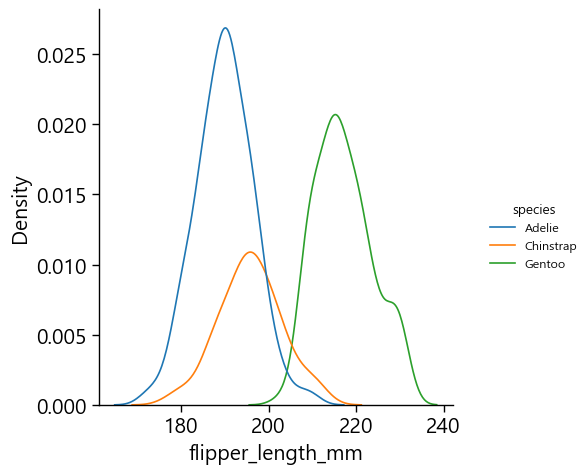

In [44]:
# 코드1: 기본 그래프
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species')

In [45]:
# 코드2: 그래프 겹쳐서 그리기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species', 
            multiple='stack')

In [46]:
# 코드3: 모든 값에서 겹친 분포 정규화하기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species',
            multiple='fill')

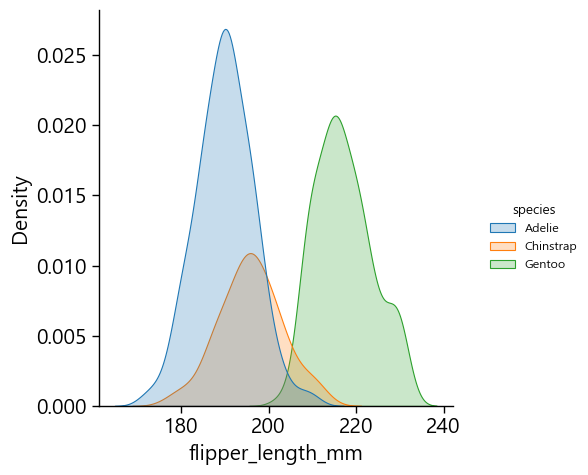

In [47]:
# 코드4: 그래프 불투명하게 그리기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species', 
            fill=True) # sns.kdeplot에서는 shade=True도 사용 가능

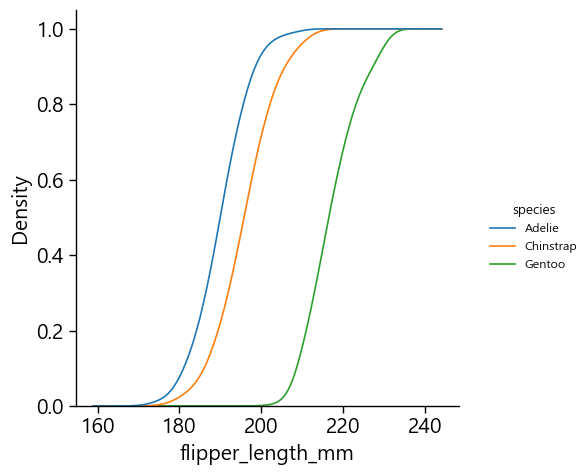

In [48]:
# 코드5: 누적분포함수(Cumulative Distribution Function, CDF) 그리기
sns.displot(penguins, x='flipper_length_mm', kind='kde', hue='species',
    cumulative=True, common_norm=False, common_grid=True)

In [49]:
# 코드6
sns.displot(penguins, x='flipper_length_mm', kind='kde', 
            hue='species',
            fill=True, common_norm=False, palette='crest',
            alpha=.5, linewidth=0)

이변량 KDE 그래프는 등고선(contours)으로 표현됩니다. 각 등고선은 밀도가 같은 지점(iso-proportions)을 이은 것입니다.

thresh: 가장 낮은 레벨의 등고선 크기 조정

levels: 등고선 개수 또는 모양

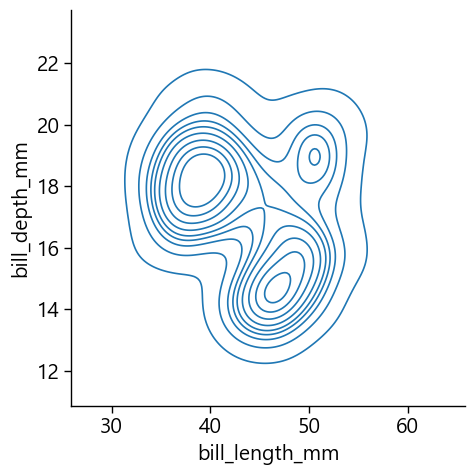

In [50]:
# 코드1 : 2차원 - 기본 그래프
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde')

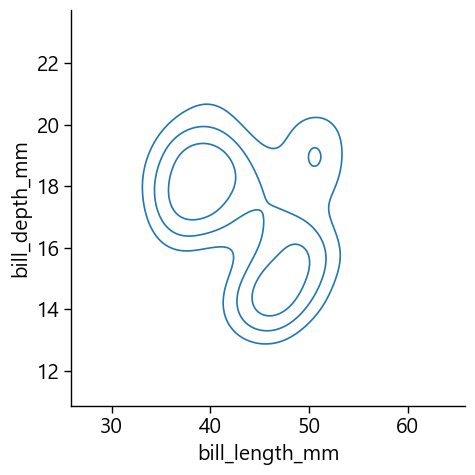

In [51]:
# 코드2 : 2차원 - 등고선 크기 및 개수 조정
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde',
            thresh=.2, levels=4)

In [52]:
# 코드3 : 2차원 - 개별 등고선 크기 조정
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde',
            levels=[.01,.05,.1,.7])

In [53]:
# 코드4 3차원 - 그룹별 그래프 색으로 구분
sns.displot(penguins, x='bill_length_mm', y='bill_depth_mm', kind='kde',
            hue='species') # fill=True 추가하면 등고선 안이 색으로 채워짐

7. 경험적 누적분포 함수.
- 경험적 누적분포함수를 그리려면 sns.ecdfplot 함수를 이용하거나 sns.displot 함수에 `kind='ecdf' 옵션을 추가하면 됩니다.

- hue_order: # 색 순서 지정

- complementary=True: 상보 누적분포함수(complementary cumulative distribution function, CCDF) 그리기

<Axes: xlabel='distance', ylabel='Density'>

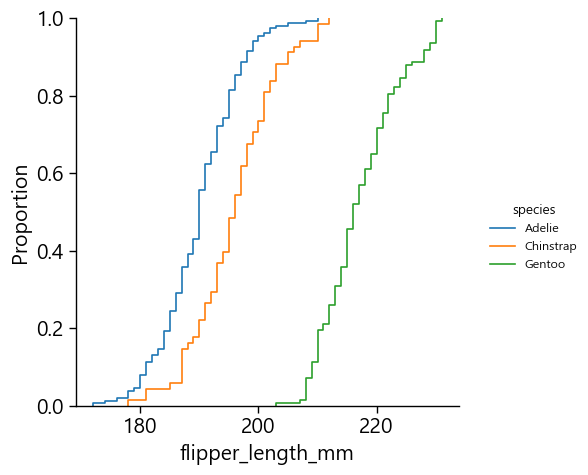

In [54]:
# 코드1
sns.displot(penguins, x='flipper_length_mm', kind='ecdf')

# 코드2
sns.displot(penguins, x='flipper_length_mm', kind='ecdf', 
            hue='species')

# 코드3
sns.displot(
    data=df_planets, x='distance', hue='method',
    hue_order=['Radial Velocity', 'Transit'], 
    log_scale=True, element='step', fill=False,
    cumulative=True, stat='density', common_norm=False)

# 코드4: 상보 누적분포함수 그리기
sns.ecdfplot(data=penguins, x='bill_length_mm', 
             hue='species', complementary=True)

8. 상자그림
- Seaborn에서 상자그림을 만들려면 sns.boxplot 함수를 이용하면 됩니다. sns.catplot 함수에 'kind='box'` 옵션을 추가해도 됩니다.

In [55]:
iris = sns.load_dataset('iris')        
sns.boxplot(data=iris)

#또는
sns.catplot(data=iris,kind='box')

- 만일 상자그림을 수평으로 그리고 싶다면 orient='h' 옵션을 추가하면 됩니다.

<Axes: >

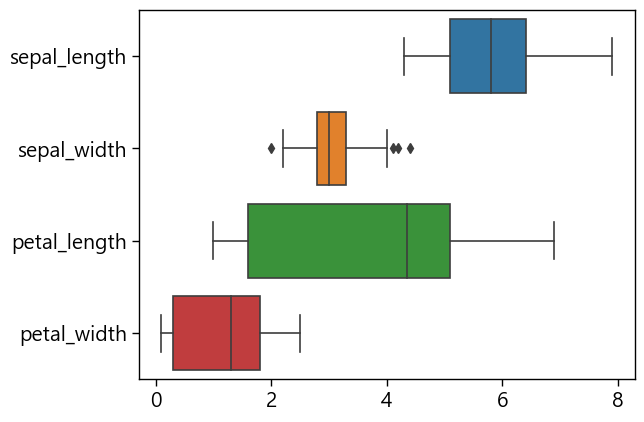

In [56]:
sns.boxplot(data=iris, orient='h')

- 3차원 박스플롯은 hue 옵션을 추가해서 그릴 수 있습니다. hue 파라미터를 더하면 비슷한 속성의 데이터끼리 분류할 수 있습니다.

In [57]:
df_tips['weekend']=tips['day'].isin(['Sat','Sun'])
sns.boxplot(x="total_bill", y='day', hue='weekend',
            orient='h',
            dodge=False,
            data=df_tips)

<Axes: xlabel='total_bill', ylabel='day'>

- 박슨 플롯
  - 박슨 플롯은 데이터를 여러 개의 분위로 나눈 박스플롯입니다. 박슨 플롯은 데이터셋을 더 많은 분위수(quantiles)로 나누어 기존의 상자그림보다 이상치(outliers)에 대해 더 많은 정보를 제공합니다. 따라서, 박슨 플롯은 큰 데이터셋을 처리하기에 적합합니다.
  - 박슨 플롯을 만들려면 sns.boxenplot을 이용하면 됩니다. sns.catplot 함수에 kind='boxen' 옵션을 추가해도 됩니다.

In [58]:
sns.boxenplot(x='color',y='price',
              data=df_diamonds.sort_values('color'))
# 또는
sns.catplot(x='color', y='price', kind='boxen',
            data=df_diamonds.sort_values('color'))

- 박슨 플롯
  - 박슨 플롯은 데이터를 여러 개의 분위로 나눈 박스플롯입니다. 박슨 플롯은 데이터셋을 더 많은 분위수(quantiles)로 나누어 기존의 상자그림보다 이상치(outliers)에 대해 더 많은 정보를 제공합니다. 따라서, 박슨 플롯은 큰 데이터셋을 처리하기에 적합합니다.
  - 박슨 플롯을 만들려면 sns.boxenplot을 이용하면 됩니다. sns.catplot 함수에 kind='boxen' 옵션을 추가해도 됩니다.

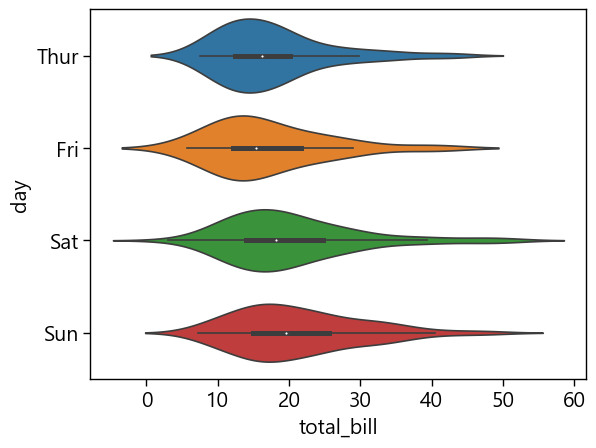

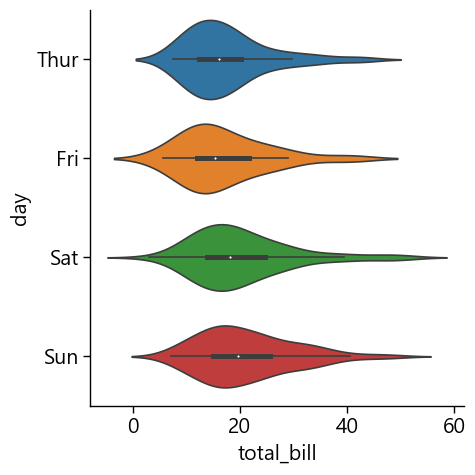

In [59]:
sns.violinplot(x='total_bill', y='day', data=df_tips)

#또는

sns.catplot(x='total_bill', y='day', kind='violin', data=df_tips)

9. 선그래프
- 선그래프는 시간 경과에 따른 연속형 변수의 변동을 보여주는 그래프입니다. Seaborn으로 선그래프를 그리려면 sns.lineplot을 이용하면 됩니다. sns.relplot 함수에 kind='line' 옵션을 주어도 됩니다. 다음은 flights 데이터에서 연별 총 탑승객수를 표현한 그래프입니다.

In [60]:
sns.lineplot(x='year', y='passengers',
             data=df_flights.groupby('year').sum())
# 또는

sns.relplot(x='year', y='passengers', kind='line',
            data=df_flights.groupby('year').sum())

TypeError: category type does not support sum operations

- 월별 데이터를 표현하고 싶다면 hue와 style 옵션을 이용해 데이터를 색상과 스타일로 구분해주면 됩니다

In [ ]:
sns.lineplot(data = df_flights, x='year', y='passengers',
             hue='month',style='month')

<Axes: xlabel='year', ylabel='passengers'>

- pandas의 pivot 함수를 이용해 만든 표를 이용해도 이 그래프와 동일한 결과를 얻을 수 있음.

In [ ]:
type(df_flights)

pandas.core.frame.DataFrame

<Axes: xlabel='year'>

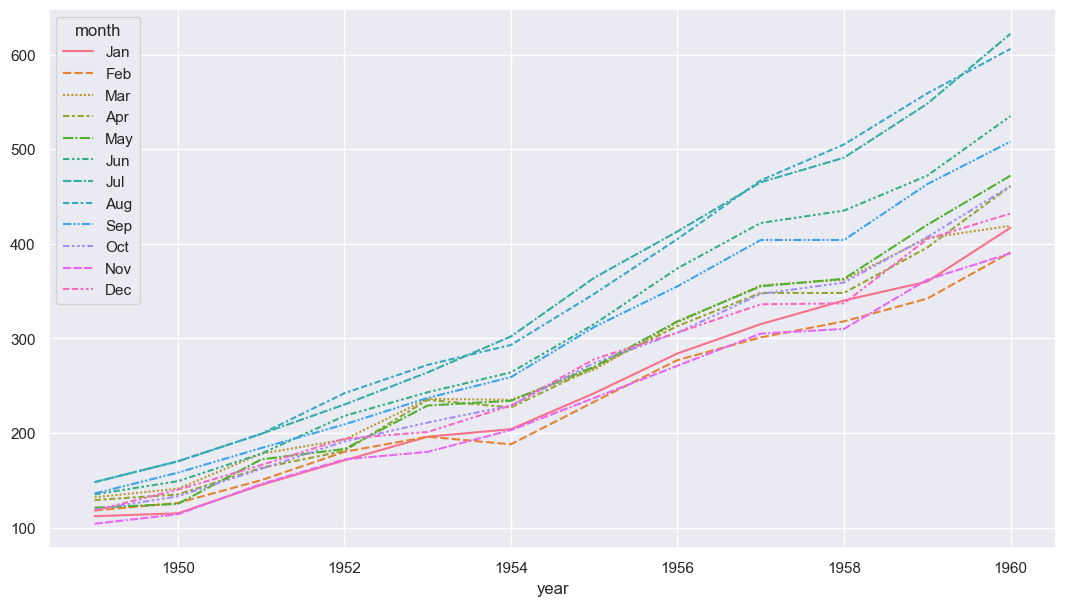

In [ ]:
flights_wide = df_flights.pivot(index='year', columns='month', values='passengers')
flights_wide
sns.lineplot(data=flights_wide)

10. 산점도
- Seaborn으로 산점도를 그리려면 sns.scatterplot 함수를 이용하면 됩니다. sns.relplot 함수에 kind='scatter' 옵션을 추가해도 됩니다.

In [ ]:
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=df_penguins)

# 또는

sns.relplot(x = penguins['bill_length_mm'], y=penguins['bill_depth_mm'], kind='scatter')

이번에는 3차원 데이터를 산점도로 시각화해 보겠습니다. 이전에도 언급했듯 다차원 데이터를 시각화할 때는 hue, col, size 등 데이터를 구분 지어 줄 수 있는 파라미터로 시각화하면 됩니다.

style: 마커 모양 자동 지정

markers: 마커 모양 수동 지정

size: 마커 크기 지정

sizes: 마커 크기의 범위 지정

legend='full': 모든 데이터포인트 보이게 하기

hue_norm: 색상 범위 지정

In [ ]:
sns.relplot(x='bill_length_mm', y='bill_depth_mm', 
            hue='island',
            size='island',
            col='sex',
            palette=['gray', 'steelblue', 'g'], sizes=(75, 200),
            alpha=.5,
            kind='scatter',
            data=penguins)

11. 결합/주변분포도
- 결합분포(joint distribution)와 주변분포(marginal distribution)를 그리려면 sns.jointplot 함수를 이용하면 됩니다. sns.jointplot은 축 수준(axes-level) 함수입니다.

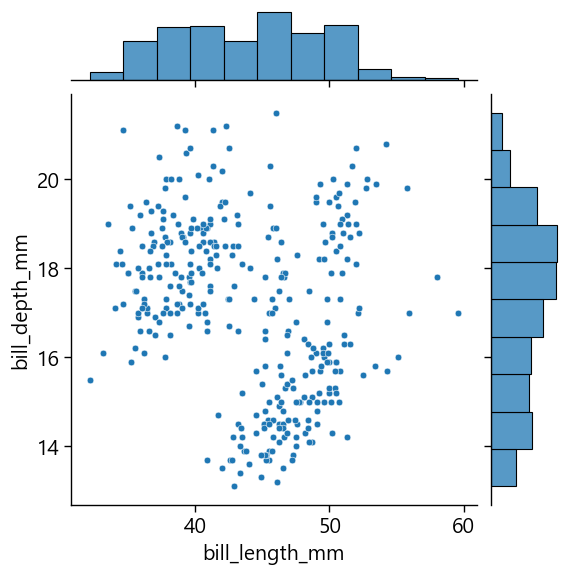

In [ ]:
# 코드1: 2차원 - 산점도 + 히스토그램
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=penguins)

# 코드2: 3차원 - 산점도 + KDE 밀도곡선
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', hue='species',
              data=penguins)

- sns.jointplot 함수에 kind='kde' 옵션을 추가하면 두 개의 분포는 KDE 그래프를 그립니다. 예제는 다음과 같습니다.

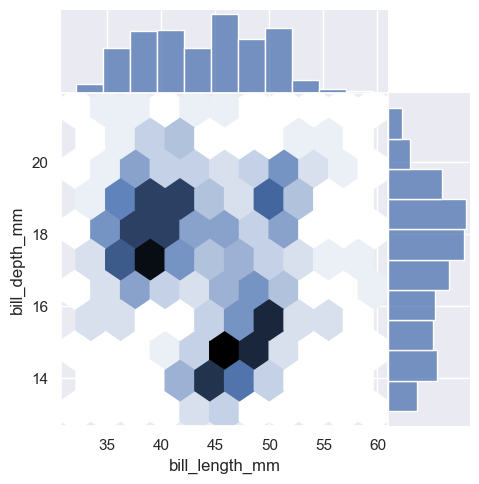

In [ ]:
# 코드3 - 2차원
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', 
              kind='hist', # 이변량 히스토그램(사각형) 그리기
              space=0, # x축, y축 공간 0으로 만들기
              height=5, ratio=4, # 크기, 비율 조정하기
              data=penguins)

# 코드4 - 2차원
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', 
              kind='hex', # 이변량 히스토그램(육각형) 그리기
              space=0, # x축, y축 공간 0으로 만들기
              height=5, ratio=4, # 크기, 비율 조정하기
              data=penguins)

# 코드5 - 2차원
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', 
              kind='reg', # 선형회귀선, KDE 밀도곡선 추가
              space=0, # x축, y축 공간 0으로 만들기
              height=5, ratio=4, # 크기, 비율 조정하기
              data=penguins)              

# 코드6 - 3차원
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', 
              kind='kde', # KDE 밀도등고선, KDE 밀도곡선 그리기
              hue='species',
              space=0, # x축, y축 공간 0으로 만들기
              height=5, ratio=4, # 크기, 비율 조정하기
              data=penguins)

- 더 다양한 종류의 결합분포 및 주변분포를 그리고 싶을 경우에는 그래프 수준(figure-level) 인터페이스인 sns.JointGrid를 이용하면 됩니다. 다음은 sns.JointGrid를 이용해 히스토그램과 박스분포를 그리는 예시 코드입니다.

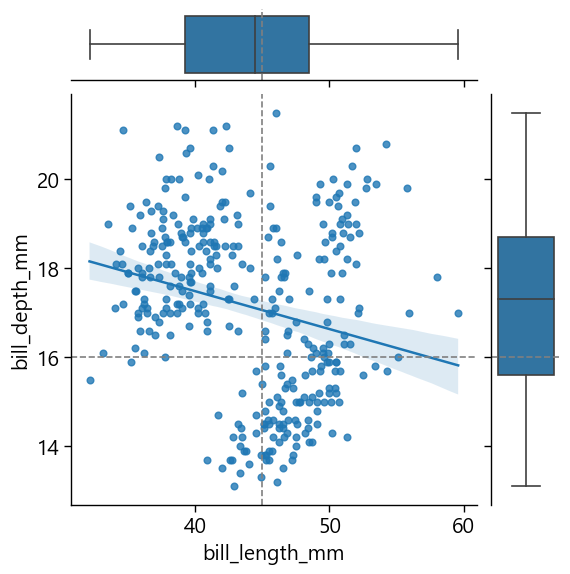

In [ ]:
# 코드1
g = sns.JointGrid(data=penguins, x='bill_length_mm', y='bill_depth_mm')
g.plot_joint(sns.scatterplot, s=100, alpha=.5, edgecolor='.2', linewidth=.5)
g.plot_marginals(sns.histplot, kde=True)

# 코드2
g = sns.JointGrid(data=penguins,  x='bill_length_mm', y='bill_depth_mm')
g.plot(sns.regplot, sns.boxplot)
g.refline(x=45, y=16)

12. 산점도 행렬
- 모든 변수에 대해 산점도 행렬을 그리고 싶다면 sns.pairplot 함수를 이용하면 됩니다.

In [ ]:
# 코드1
sns.pairplot(penguins)

- corner=True 옵션을 추가하면 산점도 행렬의 절반만 그릴 수도 있습니다.

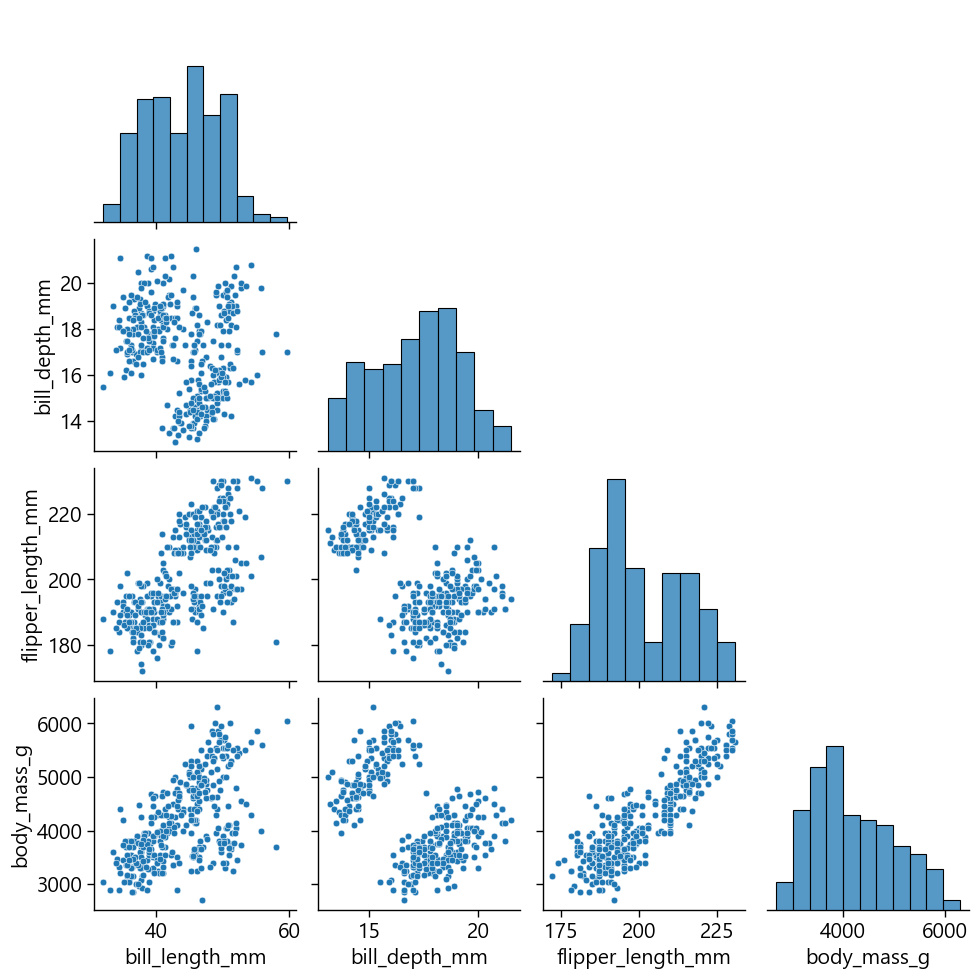

In [ ]:
sns.pairplot(df_penguins, corner=True)

- 원하는 특정 변수를 지정해서 산점도 행렬을 그릴 수도 있습니다.

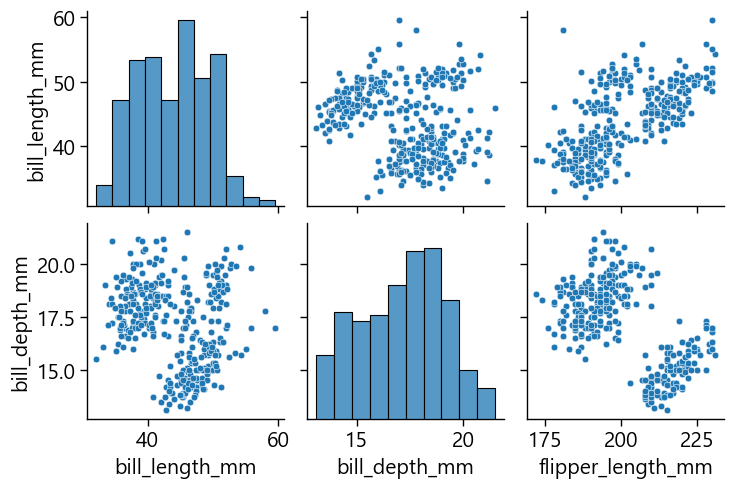

In [ ]:
sns.pairplot(df_penguins,
             x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
             y_vars=['bill_length_mm', 'bill_depth_mm'])

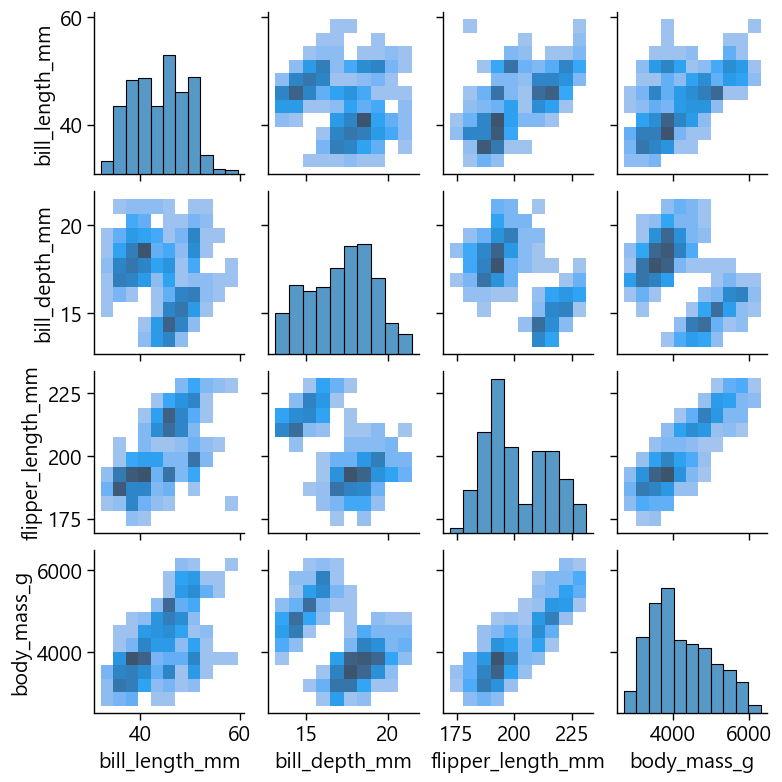

In [ ]:
sns.pairplot(penguins, kind='hist', 
             height=2)

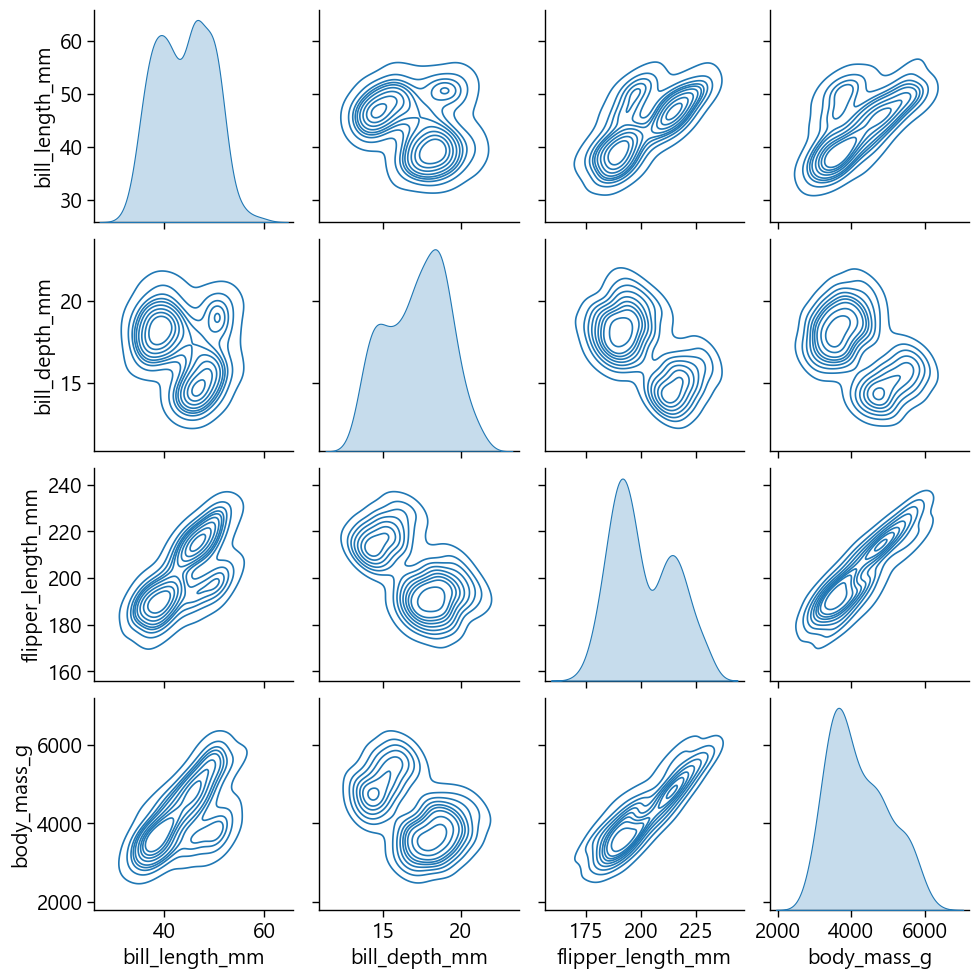

In [ ]:
sns.pairplot(penguins, kind='kde') # KDE 곡선 그리기

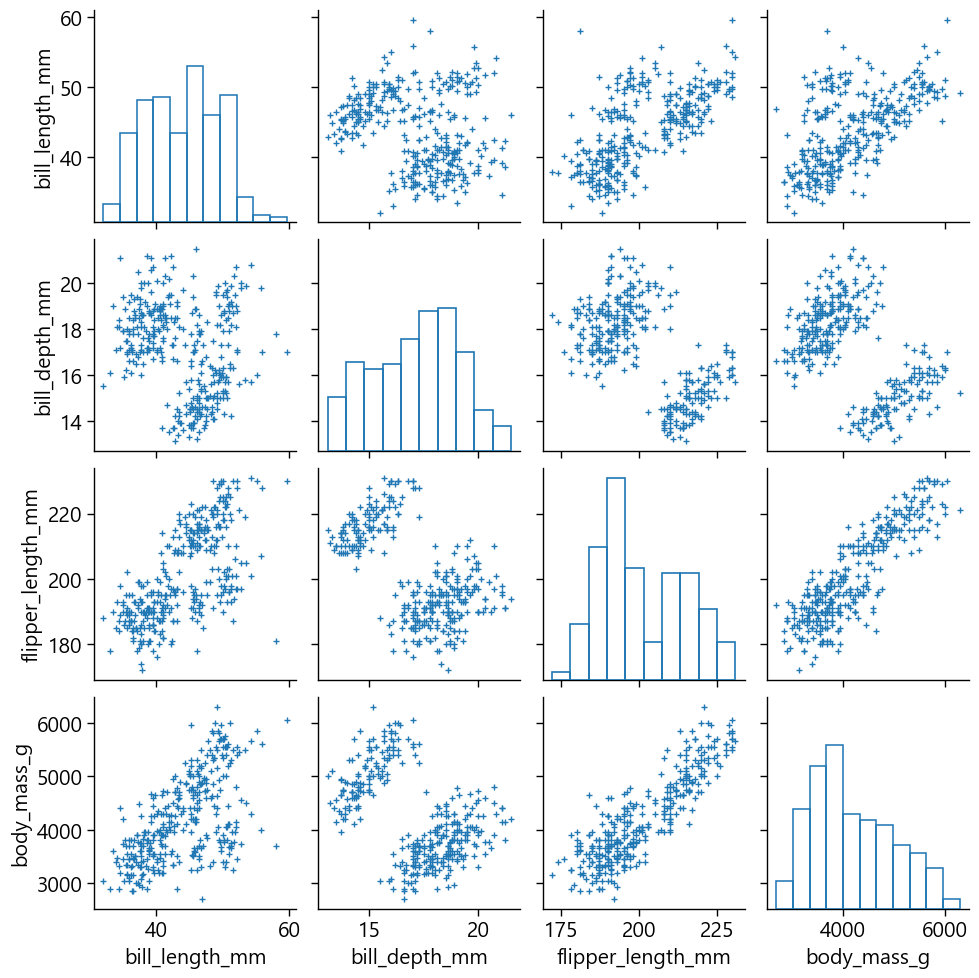

In [ ]:
sns.pairplot(penguins,
    plot_kws=dict(marker='+', linewidth=1), # 비대각선 방향에 있는 그래프 옵션
    diag_kws=dict(fill=False)) # 대각선 방향에 있는 그래프 옵션

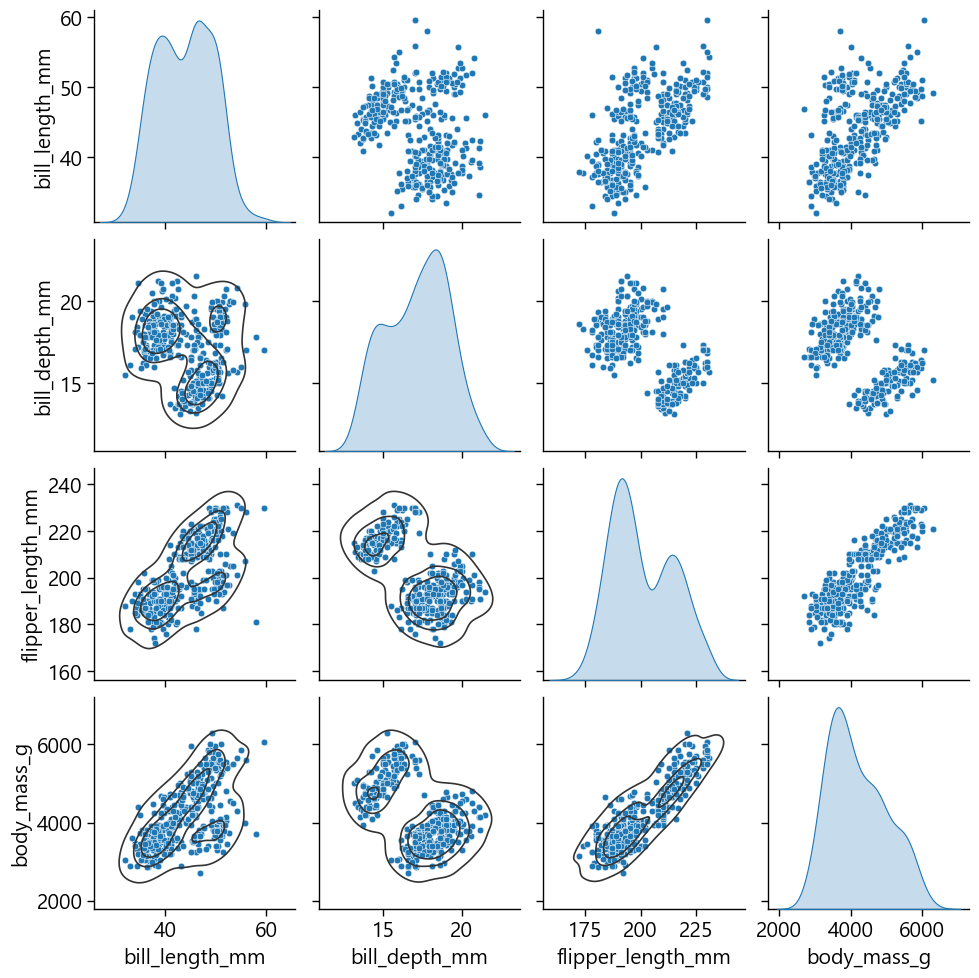

In [ ]:
g = sns.pairplot(penguins, diag_kind='kde') # 대각선 그래프는 KDE 함수
g.map_lower(sns.kdeplot, levels=4, color='.2') # KDE 곡선 수준과 색 지정하기

- 3차원 이상의 산점도 행렬을 그리려면 hue 옵션을 추가하면 됩니다.

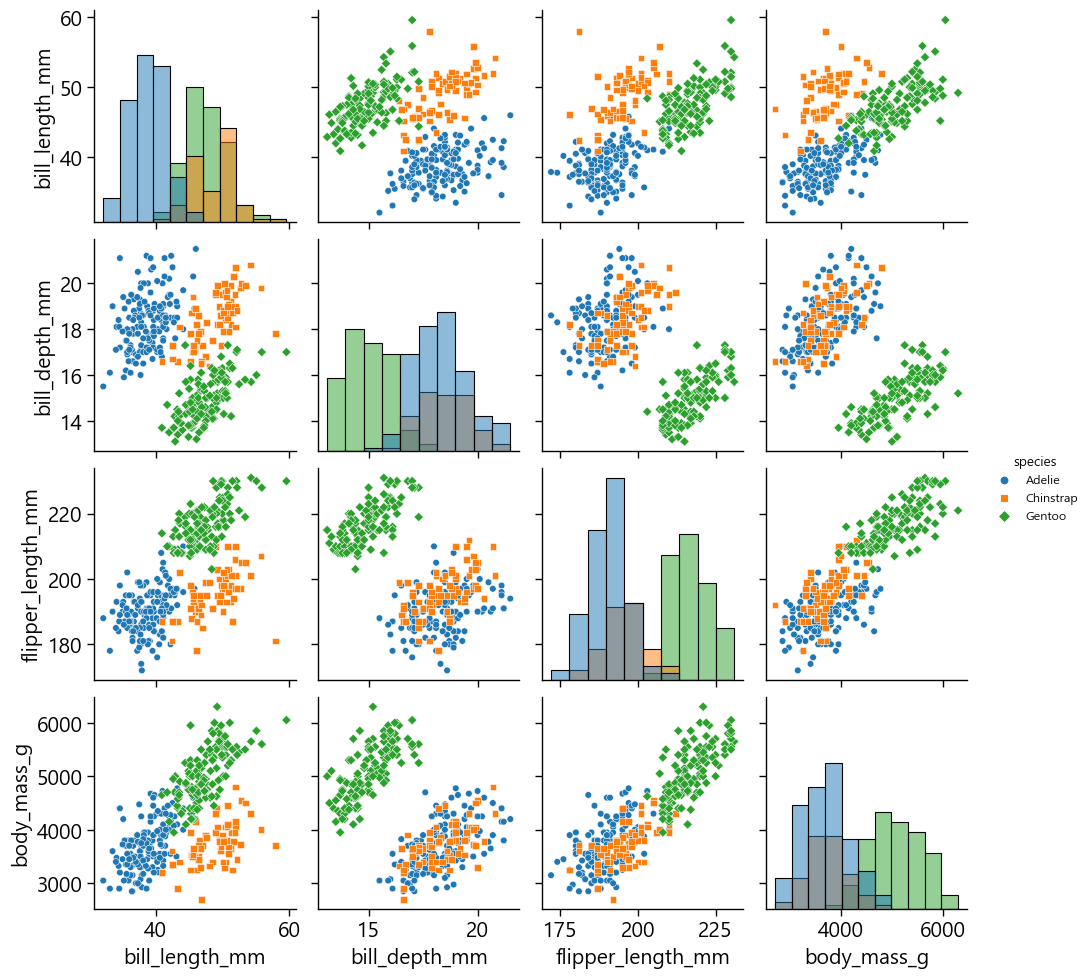

In [ ]:
sns.pairplot(penguins, hue='species', 
             markers=['o', 's', 'D'], # 마커 지정
             diag_kind='hist') # 대각선 방향에 들어갈 그래프: 히스토그램

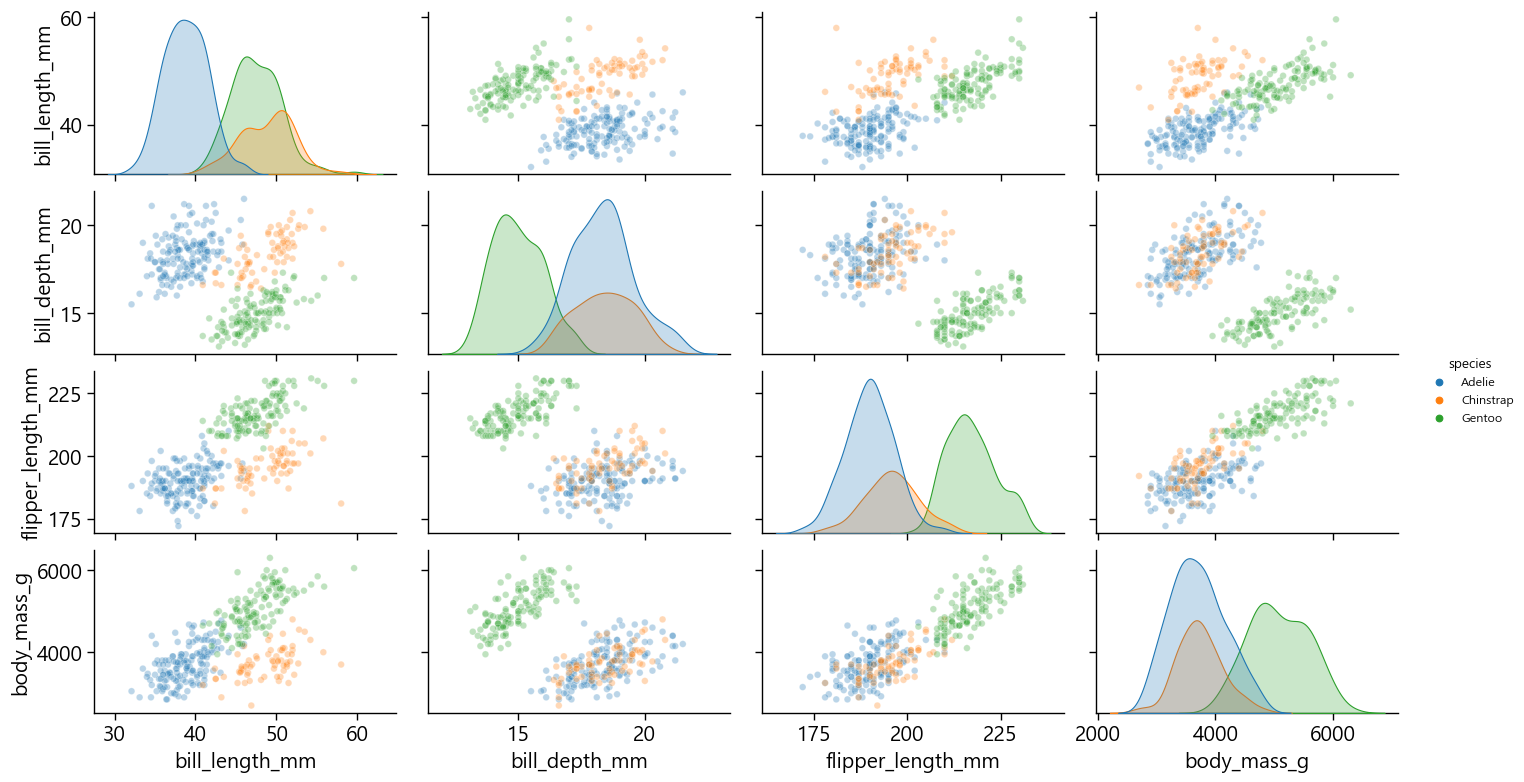

In [ ]:
sns.pairplot(penguins,
             hue='species',
             size=2, aspect=1.8,
             plot_kws=dict(linewidth=0.5, alpha=0.3),
             diag_kind='kde', 
             diag_kws=dict(shade=True))

- 더 세밀한 산점도 행렬을 그리고 싶다면 그래프 수준 인터페이스인 sns.PairGrid 클래스를 이용하면 됩니다. sns.PairGrid 클래스로는 그리고 싶은 그래프를 직접 지정할 수 있습니다. 다음은 sns.kdeplot과 sns.histplot 함수를 이용해 이변량 히스토그램과 KDE 그래프를 그리는 예제입니다.


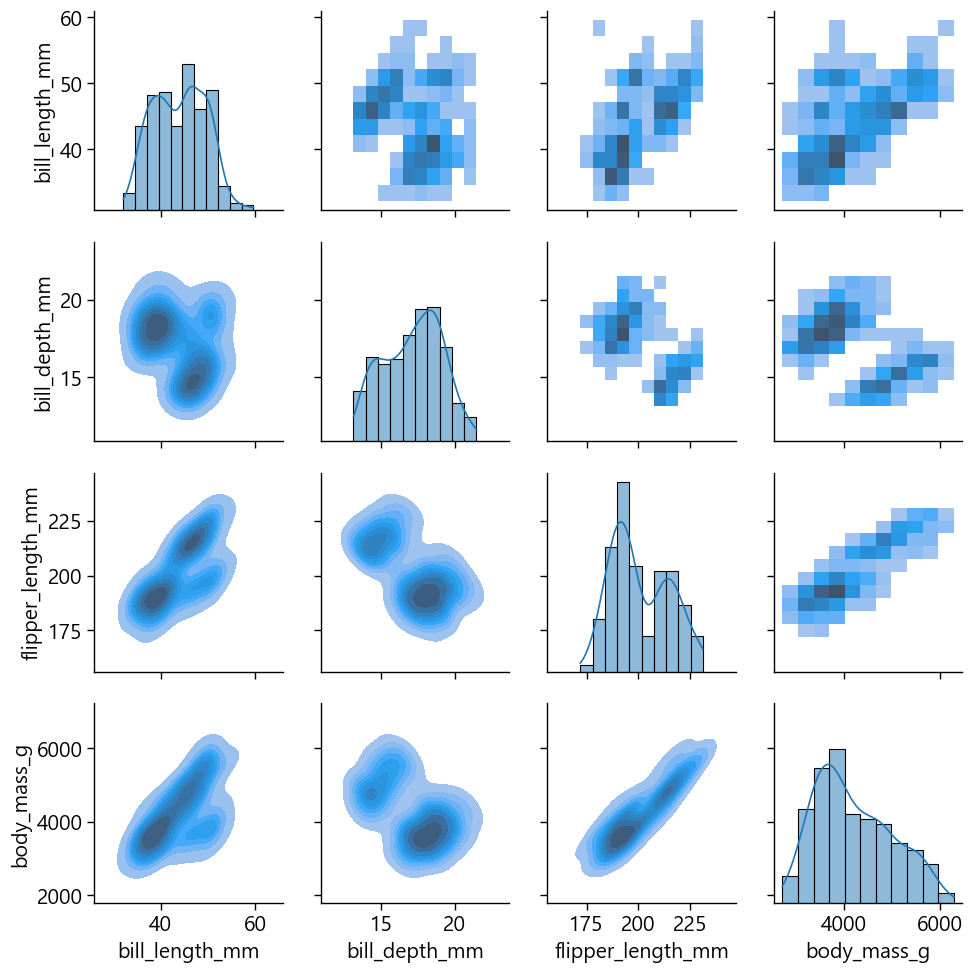

In [ ]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

13. 상관행렬
- Seaborn으로 상관행렬 히트맵(heatmap)을 그리고 싶다면 sns.heatmap를 이용하면 됩니다.

- heatmap 상관행렬 히트맵을 만들려면 먼저 상관행렬을 만든뒤 해당 상관행렬 데이터를 sns.- heatmap 함수에 전달하면 됩니다.

In [ ]:
wine_data = load_wine()
df_wines = pd.DataFrame(data=wine_data.data, # 와인 데이터
                       columns=wine_data.feature_names)

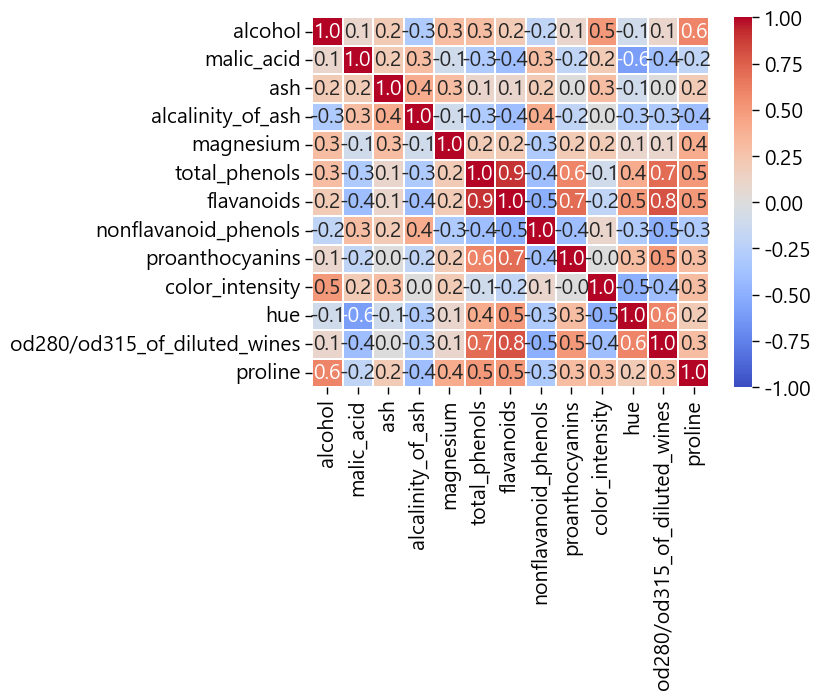

In [ ]:
df_wines = df_wines.sample(frac=1, random_state=7).reset_index(drop=True) # 샘플 무작위로 만들기
corr = df_wines.corr() # 상관행렬 표 만들기
sns.heatmap(round(corr,1), 
            annot=True, # 상관계수 표시
            fmt='.1f', # 상관계수 소수점 자리
            cmap='coolwarm', # 컬러맵 색상 팔레트 
            vmax=1.0, # 상관계수 최댓값 
            vmin=-1.0, # 상관계수 최솟값
            linecolor='white', # 셀 테두리 색상 
            linewidths=.05) # 셀 간격 
sns.set(rc={'figure.figsize':(13,7)}) # 그래프 크기

- clustermap
  - Seaborn으로 클러스터맵(cluster map)을 그리려면 sns.clustermap 함수를 이용하면 됩니다. sns.clustermap 함수에는 sns.heatmap 함수와 달리 standard_sacle 파라미터가 있어 클러스터맵의 범위를 0~1로 정규화할 수 있습니다.

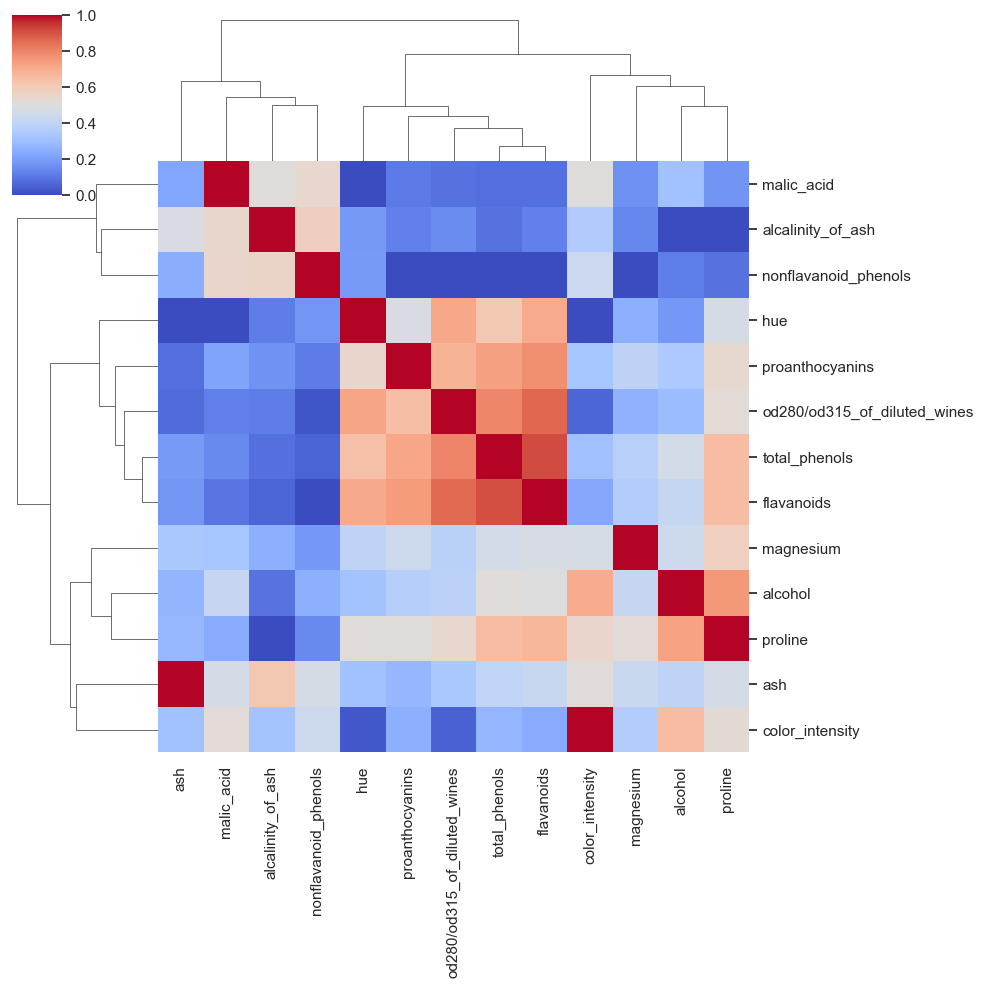

In [ ]:
corr = df_wines.corr() # 상관행렬 표 만들기
sns.clustermap(corr, 
               cmap='coolwarm', # 컬러맵 색상 팔레트 
               standard_scale=1)

Lecture_Note/머신러닝/07. 사이킷런으로 배우는 머신러닝.pdf

14. 회귀 그래프
- Seaborn으로 회귀 그래프를 그리고 싶다면 sns.regplot 또는 sns.lmplot을 이용하면 됩니다. 먼저 sns.regplot 사용법부터 살펴보겠습니다.
- regplot
  - sns.regplot은 축 수준(axes-level) 함수로 이 함수를 이용하면 산점도에 회귀선(regression line)과 신뢰구간을 추가할 수 있습니다.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

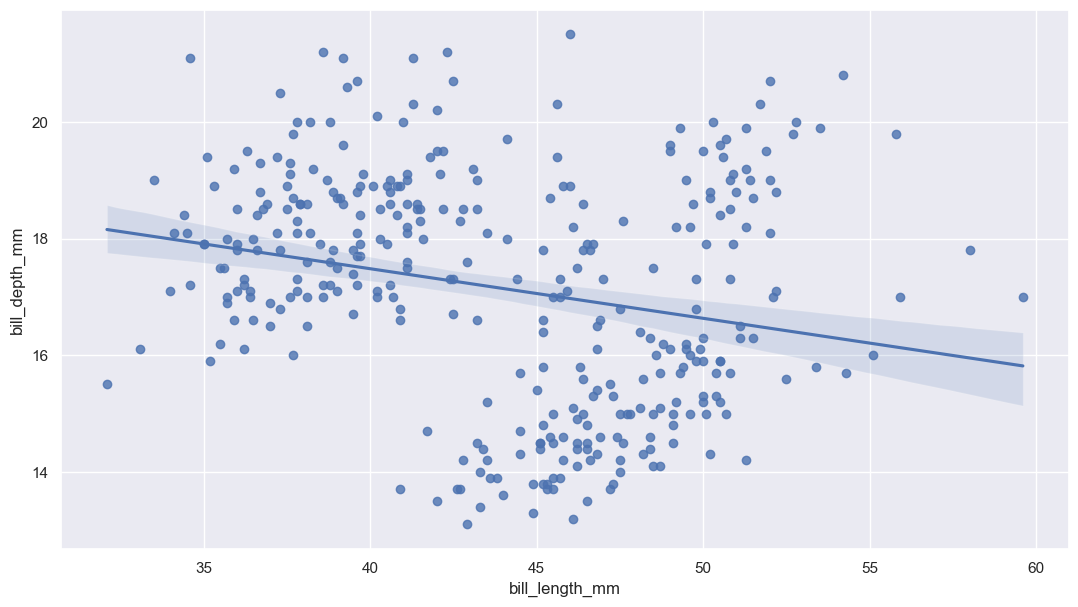

In [ ]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm', 
            data=penguins)

- 여기에 lowess=True 옵션을 추가하면 회귀선을 선형이 아니라 중요한 데이터에 가중치를 높이는 국소 회귀(local regression) 기법으로 그립니다. lowess는 locally weighted robust scatterplot smoothing의 약자입니다.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

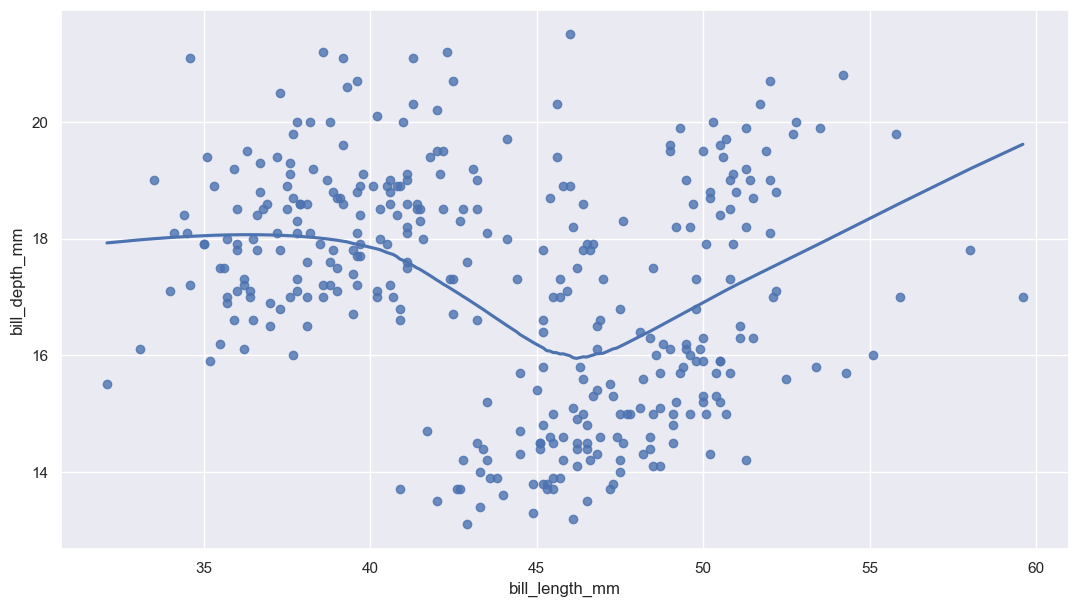

In [ ]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm', 
            lowess=True,
            data=df_penguins)

scatter_kws: 점 색상(facecolor, fc), 점 테두리 색상(edgecolor, ec), 크기(size, s), 투명도 지정

color: 선 색상 지정

line_kws: 선 굵기(linewidth, lw), 선 스타일(line style, ls), 투명도 지정

ci: 신뢰구간 지정(기본값: 95)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

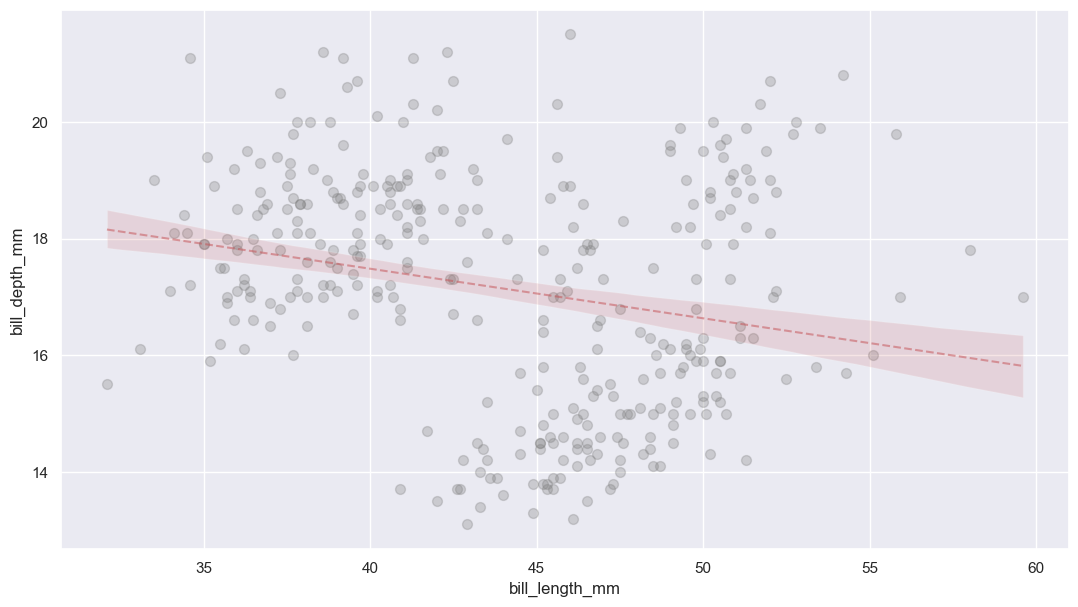

In [ ]:
sns.regplot(x='bill_length_mm', y='bill_depth_mm',
            scatter_kws={'fc':'gray', 'ec':'gray', 's':50, 'alpha':0.3},
            color='r', 
            line_kws={'lw':1.5, 'ls':'--','alpha':0.5},
            ci=90,
            data=df_penguins)

- lmplot
  - sns.lmplot 역시 sns.regplot과 마찬가지로 회귀 그래프를 만들 수 있습니다. 단, sns.lmplot은 그래프 수준(figure-level) 함수로 FacetGrid를 만듭니다. sns.lmplot은 그래프 수준 함수이기 때문에 sns.regplot에서와 달리 hue 또는 col옵션을 사용할 수 있습니다.

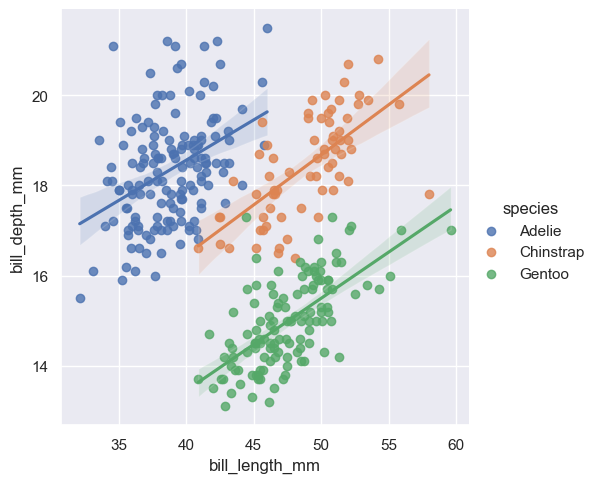

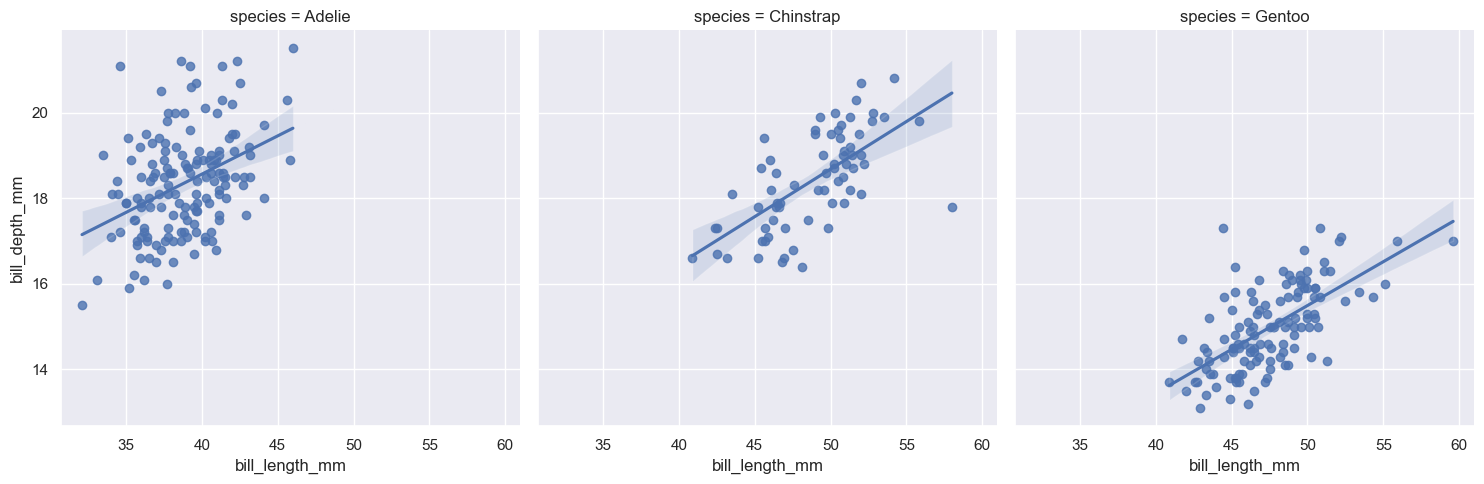

In [ ]:
# 코드1
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', 
           hue='species',
           data=df_penguins)

# 코드2
sns.lmplot(x='bill_length_mm', y='bill_depth_mm', 
           col='species',
           data=df_penguins)

전체 데이터포인트를 배경으로 만들고 싶다면 다음 코드를 이용하면 됩니다.

truncate=False: 회귀선 x축 끝까지 표현하지 않기

facet_kws=dict(sharex=False, sharey=False): x축, y축 공유하지 않기

line_kws: 회귀선 스타일 지정하기

scatter_kws: 산점도 점 스타일 지정하기

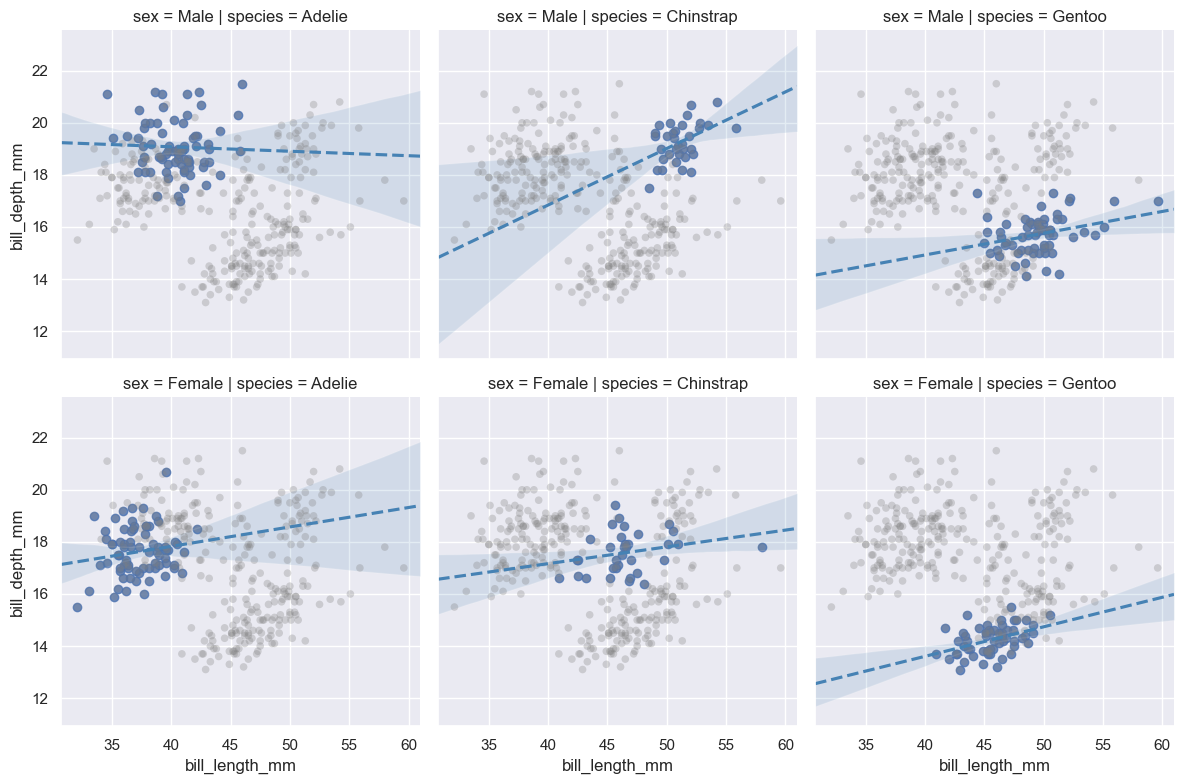

In [ ]:
g = sns.lmplot(x='bill_length_mm', y='bill_depth_mm', 
               col='species', row='sex',
               height=4,
               truncate=False,
               line_kws={'color':'steelblue','linestyle':'--' },
               data=df_penguins)

axes = g.axes               # FacetGrid에서 AxesSubplots을 추출
for ax in axes.ravel():     # AxesSubplots을 순회하여 전체 데이터를 배경으로 표현
    sns.regplot(x='bill_length_mm', y='bill_depth_mm', 
                fit_reg=False, # 전체 회귀선 숨기기
                scatter_kws={'fc':'gray', 'ec':'none', 's':30, 'alpha':0.3}, 
                ax=ax,
                data=df_penguins)

- resideplot
  - sns.resideplot은 실제 데이터포인트와 회귀선과의 잔차(residuals)를 표현하는 함수입니다.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

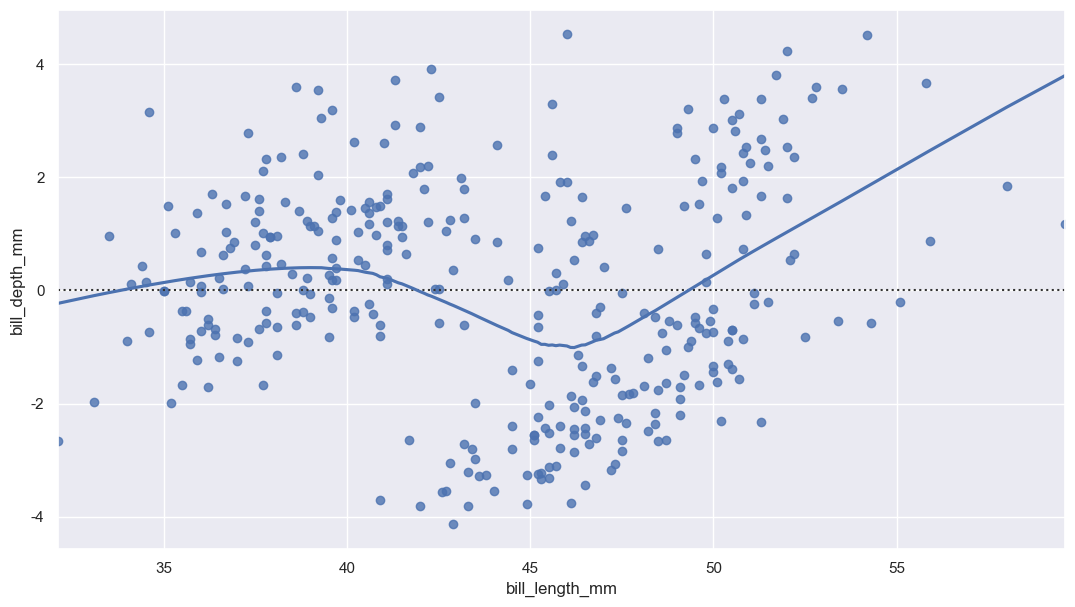

In [ ]:
sns.residplot(x='bill_length_mm', y='bill_depth_mm', 
              lowess=True,
              data=df_penguins)